<a href="https://colab.research.google.com/github/gabrielcn/Bike_Sharing/blob/main/cyclistic_bike_chicago_ny_was.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Compartilhamento de bicicletas em Chicago - 2016 (Divvy)***


In [1]:
import pandas as pd #Importa a biblioteca pandas para ler o arquivo
import seaborn as sns #Importa a biblioteca seaborn
import matplotlib.pyplot as plt #Importa a bilbioteca matplotlib
import csv 
import numpy as np
from datetime import datetime #operações para analisar datas

In [2]:
df_chicago = pd.read_csv("Chicago-2016-Summary.csv") #Atribui a uma variável 

In [3]:
df_chicago

,duration,month,hour,day_of_week,user_type
0,15.433333,3,23,Thursday,Subscriber
1,3.300000,3,22,Thursday,Subscriber
2,2.066667,3,22,Thursday,Subscriber
3,19.683333,3,22,Thursday,Subscriber
4,10.933333,3,22,Thursday,Subscriber
...,...,...,...,...,...
72126,3.883333,10,1,Saturday,Subscriber
72127,7.866667,10,1,Saturday,Subscriber
72128,17.816667,10,0,Saturday,Customer
72129,24.866667,10,0,Saturday,Subscriber


In [4]:
df_chicago.shape #Formato da tabela

(72131, 5)

**Formatando e explorando o data set**

In [5]:
df_chicago.columns = ["duracao" , "mes" , "hora" , "dia_semana", "tipo_usuario"] #renomear colunas [] lista (columns é um atributo do pandas)
df_chicago.head()

,duracao,mes,hora,dia_semana,tipo_usuario
0,15.433333,3,23,Thursday,Subscriber
1,3.300000,3,22,Thursday,Subscriber
2,2.066667,3,22,Thursday,Subscriber
3,19.683333,3,22,Thursday,Subscriber
4,10.933333,3,22,Thursday,Subscriber


In [6]:
df_chicago['mes'].unique() #Todos os valores que foram colocados na coluna mes

array([ 3,  2,  1,  4,  5,  6,  9,  8,  7, 12, 11, 10])

In [7]:
df_chicago['mes'].value_counts() #Quantas vezes em cada mes

7     10286
8      9810
6      9794
9      8700
5      7211
10     7160
11     4811
4      4567
3      3719
2      2394
1      1901
12     1778
Name: mes, dtype: int64

**Análise de viagens por dia de todos os usuários**

In [8]:
df_chicago['dia_semana'].value_counts() #Quantas vezes em cada dia

Monday       11286
Tuesday      10911
Friday       10741
Thursday     10008
Saturday      9927
Sunday        9654
Wednesday     9604
Name: dia_semana, dtype: int64

**Quantidade de viagens por dia no ano de 2016**

In [9]:
qtd_viagem_por_dia_chicago = df_chicago['dia_semana'].value_counts() #Quantas vezes em cada dia

In [10]:
qtd_viagem_por_dia_chicago #Chicago

Monday       11286
Tuesday      10911
Friday       10741
Thursday     10008
Saturday      9927
Sunday        9654
Wednesday     9604
Name: dia_semana, dtype: int64

In [11]:
qtd_viagem_por_dia_chicago.to_frame()

,dia_semana
Monday,11286
Tuesday,10911
Friday,10741
Thursday,10008
Saturday,9927
Sunday,9654
Wednesday,9604


In [12]:
df_qtd_viagem_por_dia_chicago = qtd_viagem_por_dia_chicago.to_frame().reset_index()

In [13]:
df_qtd_viagem_por_dia_chicago #Quantidade total de viagens por dia em 2016

,index,dia_semana
0,Monday,11286
1,Tuesday,10911
2,Friday,10741
3,Thursday,10008
4,Saturday,9927
5,Sunday,9654
6,Wednesday,9604


In [14]:
df_qtd_viagem_por_dia_chicago.columns = ["dias", "total"]
df_qtd_viagem_por_dia_chicago

,dias,total
0,Monday,11286
1,Tuesday,10911
2,Friday,10741
3,Thursday,10008
4,Saturday,9927
5,Sunday,9654
6,Wednesday,9604


**Frequencia de viagens por dia da semana de todos os usuários**

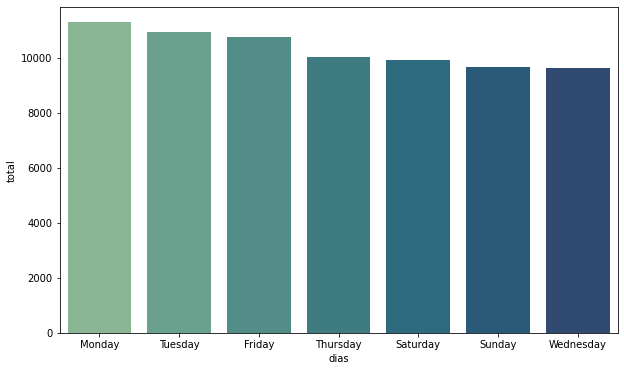

In [15]:
plt.figure(figsize=(10,6)) #Configura o tamanho da figura (10 para direita e 6 para baixo)
sns.barplot(x="dias", y="total", data = df_qtd_viagem_por_dia_chicago, palette = "crest") #pallete, atributo que permite escolher um palete de cor, no caso é crest

**Análise de usuários de (tipo/hora/mes)**



In [16]:
df_chicago

,duracao,mes,hora,dia_semana,tipo_usuario
0,15.433333,3,23,Thursday,Subscriber
1,3.300000,3,22,Thursday,Subscriber
2,2.066667,3,22,Thursday,Subscriber
3,19.683333,3,22,Thursday,Subscriber
4,10.933333,3,22,Thursday,Subscriber
...,...,...,...,...,...
72126,3.883333,10,1,Saturday,Subscriber
72127,7.866667,10,1,Saturday,Subscriber
72128,17.816667,10,0,Saturday,Customer
72129,24.866667,10,0,Saturday,Subscriber


In [17]:
df_chicago.loc[df_chicago.tipo_usuario=='Subscriber'].value_counts().sum() #Localiza a coluna tipo_usuario e conta todos que são "Subscriber" e a função sum, soma tudo.
#Obs: Não sabemos se tem usuário repetido na tabela, vamos usar a abordagem de frequencia para saber se usuários cadastrados são mais frequentes que usuários customizados

54982

In [18]:
subscriber_chicago = df_chicago.loc[df_chicago.tipo_usuario=='Subscriber'].value_counts().sum()

In [19]:
df_chicago.loc[df_chicago.tipo_usuario=='Customer'].value_counts().sum() #Localiza a coluna tipo_usuario e conta todos que são "Customer" e a função sum, soma tudo.
#Obs: Não sabemos se tem usuário repetido na tabela, vamos usar a abordagem de frequencia para saber se usuários cadastrados são mais frequentes que usuários customizados

17149

In [20]:
customer_chicago = df_chicago.loc[df_chicago.tipo_usuario=='Customer'].value_counts().sum()

In [21]:
54982 + _

72131

**Frequencia dos tipos de usuários em relação ao horário**

Quartis: Os quartis dividem os dados em quatro partes. Ordenando os dados cada quartil vai possuir 25% das observações. Ou seja, os primeiros 25% das observação estarão até o corte do 1º quartil, os próximos 25% até o corte do 2º quartil, etc.

Limites: O limite inferior é calculado sendo, geralmente, 1,5 vezes o corte do 1º quartil e o limite superior sendo 1,5 vezes o corte do 3º quartil.
O corte do segundo quartil é igual a mediana.

Outliers são observações atípicas, muito afastadas da maioria dos dados. Num boxplot esses valores ficam abaixo do limite inferior ou acima do limite superior.

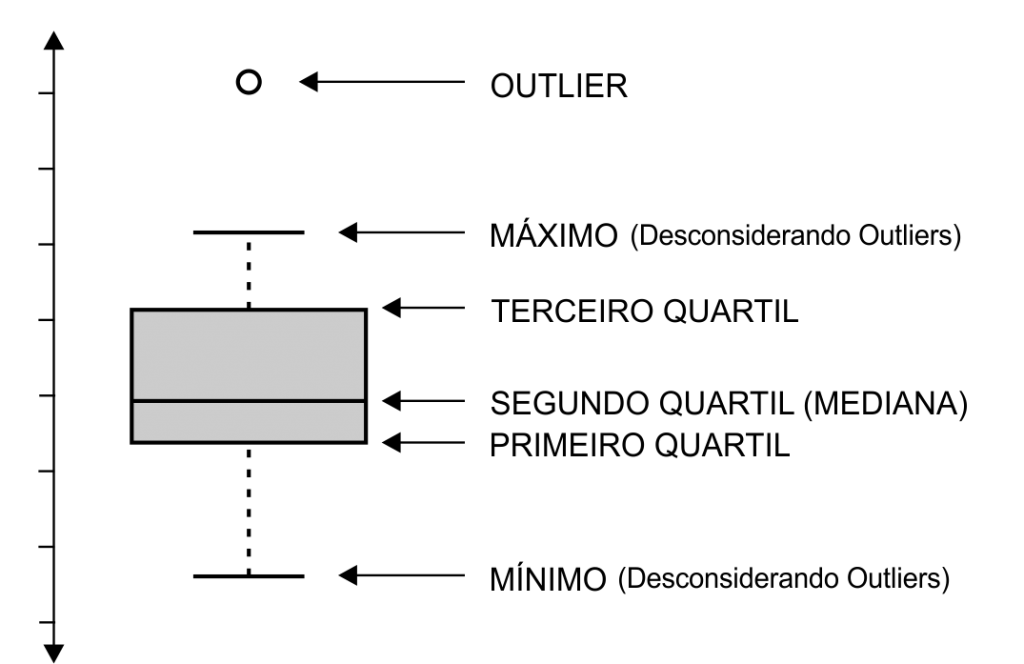

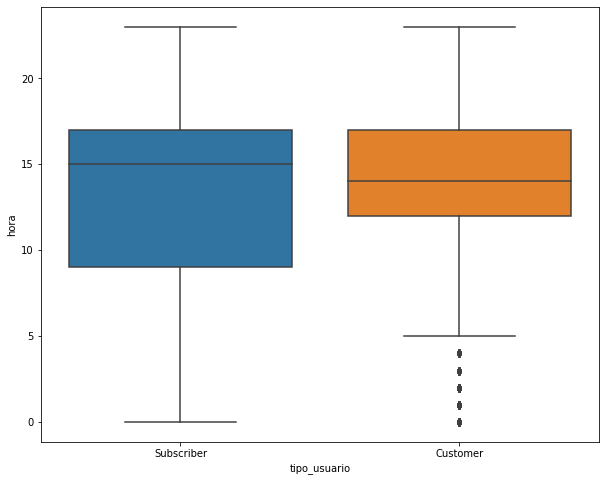

In [22]:
plt.figure(figsize=(10,8)) #Configura o tamanho da figura (10 para direita e 8 para baixo)
sns.boxplot(x="tipo_usuario", y="hora", data = df_chicago) 
# Grafico mostra que mostra a frequencia dos tipos de usuários em relação ao horário e o desvio padrão (standart deviation)

In [23]:
df_chicago.groupby("tipo_usuario").median()["hora"] # Mediana

tipo_usuario
Customer      14.0
Subscriber    15.0
Name: hora, dtype: float64

**Análise de viagens por hora e por mes**

In [24]:
#Substitui valores da coluna por condição em pandas
df_chicago.loc[df_chicago.mes==1, "mes"]='jan'
df_chicago.loc[df_chicago.mes==2, "mes"]='fev'
df_chicago.loc[df_chicago.mes==3, "mes"]='mar'
df_chicago.loc[df_chicago.mes==4, "mes"]='abr'
df_chicago.loc[df_chicago.mes==5, "mes"]='mai'
df_chicago.loc[df_chicago.mes==6, "mes"]='jun'
df_chicago.loc[df_chicago.mes==7, "mes"]='jul'
df_chicago.loc[df_chicago.mes==8, "mes"]='ago'
df_chicago.loc[df_chicago.mes==9, "mes"]='set'
df_chicago.loc[df_chicago.mes==10, "mes"]='out'
df_chicago.loc[df_chicago.mes==11, "mes"]='nov'
df_chicago.loc[df_chicago.mes==12, "mes"]='dez'

In [25]:
df_chicago['mes'].value_counts() #Quantidade de viagens por mes em Chicago

jul    10286
ago     9810
jun     9794
set     8700
mai     7211
out     7160
nov     4811
abr     4567
mar     3719
fev     2394
jan     1901
dez     1778
Name: mes, dtype: int64

In [26]:
qtd_viagem_mes_chicago = df_chicago['mes'].value_counts() 

In [27]:
qtd_viagem_mes_chicago = qtd_viagem_mes_chicago.to_frame().reset_index()

In [28]:
qtd_viagem_mes_chicago

,index,mes
0,jul,10286
1,ago,9810
2,jun,9794
3,set,8700
4,mai,7211
5,out,7160
6,nov,4811
7,abr,4567
8,mar,3719
9,fev,2394


In [29]:
qtd_viagem_mes_chicago.columns = ["mes", "total"]
qtd_viagem_mes_chicago

,mes,total
0,jul,10286
1,ago,9810
2,jun,9794
3,set,8700
4,mai,7211
5,out,7160
6,nov,4811
7,abr,4567
8,mar,3719
9,fev,2394


**Análise geral por mes (todos os usuários, customer e subscriber)**

**Opção 1**

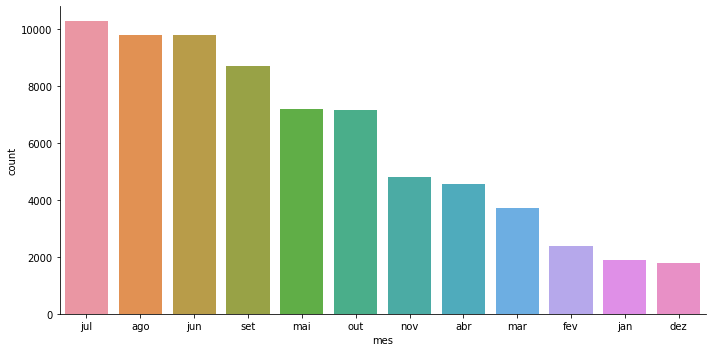

In [30]:
sns.catplot(x="mes", kind="count", data = df_chicago, aspect = 2, order = df_chicago['mes'].value_counts().index) 
# usando alto nível, o sns.catplot vai plotar categoricamente as categorias de "mes", de maneira que conte (kind="count") quantas vezes aparece, e o data = df_chicago (está usando o DF df_chicago que importamos)
# aspect configura o tamanho da figura, colocando o 2 para trazer o dobro (retangulo) do quadrado.
# E o order define a ordem como é apresentado o gráfico, no caso é a ordem da série df_chicago['mes'].value_counts().index e o ".index" é o indice que está definida a ordem. index da série.

**Opção 2**

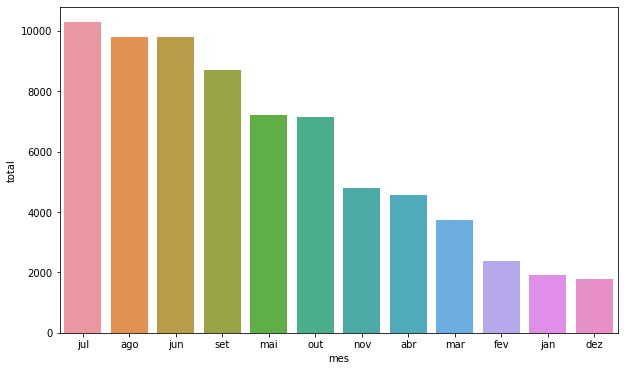

In [31]:
plt.figure(figsize=(10,6)) #Configura o tamanho da figura (10 para direita e 6 para baixo)
sns.barplot(x="mes", y="total", data = qtd_viagem_mes_chicago)

**Análise por horário (todos os usuários)**

In [32]:
df_chicago['hora'].unique()

array([23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  4,  0,  5,  2,  3,  1])

In [33]:
df_chicago['hora'].value_counts() #Quantidade de viagens no ano de 2016 por horário

17    8564
16    6622
18    5786
8     5454
15    4739
13    4313
7     4256
12    4208
14    4199
19    3905
11    3693
9     3190
10    2820
20    2519
6     2024
21    1925
22    1346
23     822
5      538
0      482
1      326
2      175
4      137
3       88
Name: hora, dtype: int64

In [34]:
qtd_viagem_hora_chicago = df_chicago['hora'].value_counts()

In [35]:
qtd_viagem_hora_chicago

17    8564
16    6622
18    5786
8     5454
15    4739
13    4313
7     4256
12    4208
14    4199
19    3905
11    3693
9     3190
10    2820
20    2519
6     2024
21    1925
22    1346
23     822
5      538
0      482
1      326
2      175
4      137
3       88
Name: hora, dtype: int64

In [36]:
qtd_viagem_hora_chicago.to_frame().reset_index()

,index,hora
0,17,8564
1,16,6622
2,18,5786
3,8,5454
4,15,4739
5,13,4313
6,7,4256
7,12,4208
8,14,4199
9,19,3905


In [37]:
qtd_viagem_hora_chicago = qtd_viagem_hora_chicago.to_frame().reset_index()

In [38]:
qtd_viagem_hora_chicago

,index,hora
0,17,8564
1,16,6622
2,18,5786
3,8,5454
4,15,4739
5,13,4313
6,7,4256
7,12,4208
8,14,4199
9,19,3905


In [39]:
qtd_viagem_hora_chicago.columns = ["hora", "total"]
qtd_viagem_hora_chicago

,hora,total
0,17,8564
1,16,6622
2,18,5786
3,8,5454
4,15,4739
5,13,4313
6,7,4256
7,12,4208
8,14,4199
9,19,3905


**Análise por hora de todos os usuários**

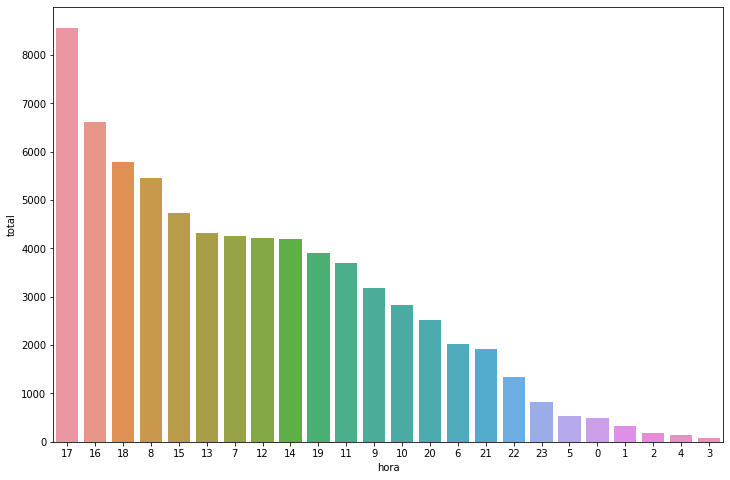

In [40]:
plt.figure(figsize=(12,8)) #Configura o tamanho da figura (12 para direita e 8 para baixo)
sns.barplot(x="hora", y="total", data = qtd_viagem_hora_chicago, order = df_chicago['hora'].value_counts().index)
# Quantidade total de viagens de todos os usuários por horário

**Quantidade ou frequencia de usuários por categoria (Subscriber e Customer)**

In [41]:
subscriber_chicago = df_chicago.loc[df_chicago.tipo_usuario=='Subscriber'].value_counts().sum()

In [42]:
subscriber_chicago

54982

In [43]:
customer_chicago = df_chicago.loc[df_chicago.tipo_usuario=='Customer'].value_counts().sum()

In [44]:
customer_chicago

17149

In [45]:
df_usuarios_chicago = {
    'tipo' : ['subscriber', 'customer'],
    'total' : [subscriber_chicago, customer_chicago]
    # {} dicionário do python
}

df_usuarios_chicago

{'tipo': ['subscriber', 'customer'], 'total': [54982, 17149]}

In [46]:
pd.DataFrame(df_usuarios_chicago) #Cria ou transforma em dataframe em cima de 'df_usuarios_chicago' que acabei de criar como dicionario

,tipo,total
0,subscriber,54982
1,customer,17149


In [47]:
df_usuarios_chicago = pd.DataFrame(df_usuarios_chicago) #É um costume sobrescrever a variável, mas não é necessário
df_usuarios_chicago

,tipo,total
0,subscriber,54982
1,customer,17149


**Analise de frequencia ou quantidades de usuarios**

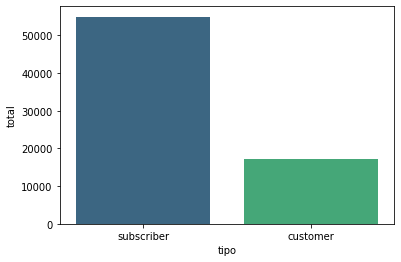

In [48]:
sns.barplot(x="tipo", y="total", data = df_usuarios_chicago, palette = "viridis") #Gráfico de barras com seaborn, definindo o "tipo" no eixo x e o "total" no eixo y, extraido do DF df_usuarios_chicago


**Duração média de viagem por tipo de usuário**

In [49]:
df_chicago.groupby("tipo_usuario").mean()["duracao"] # Duração média por tipo de usuário em minutos

tipo_usuario
Customer      30.979781
Subscriber    12.067202
Name: duracao, dtype: float64

In [50]:
df_chicago.groupby("tipo_usuario").mean()["duracao"].to_frame()

,duracao
tipo_usuario,
Customer,30.979781
Subscriber,12.067202


In [51]:
df_media_viagem_users_chicago = df_chicago.groupby("tipo_usuario").mean()["duracao"].to_frame().reset_index()
df_media_viagem_users_chicago

,tipo_usuario,duracao
0,Customer,30.979781
1,Subscriber,12.067202


In [52]:
df_media_viagem_users_chicago.columns = ['users', 'duracao']

In [53]:
df_media_viagem_users_chicago.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2.5px solid black')]}])

,users,duracao
0,Customer,30.979781
1,Subscriber,12.067202


**Mediana de viagem por tipo de usuário**

In [54]:
df_chicago.groupby("tipo_usuario").median()["duracao"] # Mediana

tipo_usuario
Customer      22.566667
Subscriber     9.616667
Name: duracao, dtype: float64

In [55]:
df_mediana_viagem_users_chicago = df_chicago.groupby("tipo_usuario").median()["duracao"].to_frame().reset_index()

In [56]:
df_mediana_viagem_users_chicago

,tipo_usuario,duracao
0,Customer,22.566667
1,Subscriber,9.616667


In [57]:
df_mediana_viagem_users_chicago.columns = ['users', 'duracao']

In [58]:
df_mediana_viagem_users_chicago.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2.5px solid black')]}])

,users,duracao
0,Customer,22.566667
1,Subscriber,9.616667


**Explorando a frequencia (mes e hora) de usuários customizados e usuários cadastrados**

In [59]:
total_tipo_usuarios_chicago = df_chicago.tipo_usuario.value_counts()

In [60]:
total_tipo_usuarios_chicago

Subscriber    54982
Customer      17149
Name: tipo_usuario, dtype: int64

In [61]:
df_chicago2 = df_chicago.copy() #Cria uma cópia do df_chicago_copy

In [62]:
df_chicago2

,duracao,mes,hora,dia_semana,tipo_usuario
0,15.433333,mar,23,Thursday,Subscriber
1,3.300000,mar,22,Thursday,Subscriber
2,2.066667,mar,22,Thursday,Subscriber
3,19.683333,mar,22,Thursday,Subscriber
4,10.933333,mar,22,Thursday,Subscriber
...,...,...,...,...,...
72126,3.883333,out,1,Saturday,Subscriber
72127,7.866667,out,1,Saturday,Subscriber
72128,17.816667,out,0,Saturday,Customer
72129,24.866667,out,0,Saturday,Subscriber


Obs: O Pandas permite filtrar um DataFrame pelos dados de sua coluna. Por exemplo, queremos pegar do data frame de chicago a coluna que define o tipe de usuario e com base nisso, queremos as linhas que são iguais a "Subscriber"

**Criando um DF para usuários Subscriber e outro para Customer**

**Explorando de usuários Subscriber por mes**

In [63]:
filtro_sub_chicago = df_chicago2['tipo_usuario'] == "Subscriber" #Filtra só usuários Subscriber na coluna 'tipo_usuario' e armazena no filtro_sub_chicago

In [64]:
subscriber_chicago = df_chicago2[filtro_sub_chicago] #Utiliza o filtro armazenado em 'filtro_sub_chicago' no df_chicago2 (cópia do df_chicago) e armazena na variável subscriber_chicago

In [65]:
subscriber_chicago #Data frame só com os usuários cadastrados

,duracao,mes,hora,dia_semana,tipo_usuario
0,15.433333,mar,23,Thursday,Subscriber
1,3.300000,mar,22,Thursday,Subscriber
2,2.066667,mar,22,Thursday,Subscriber
3,19.683333,mar,22,Thursday,Subscriber
4,10.933333,mar,22,Thursday,Subscriber
...,...,...,...,...,...
72125,20.733333,out,1,Saturday,Subscriber
72126,3.883333,out,1,Saturday,Subscriber
72127,7.866667,out,1,Saturday,Subscriber
72129,24.866667,out,0,Saturday,Subscriber


In [66]:
subscriber_chicago.mes.value_counts()

jun    7182
ago    7053
jul    6963
set    6346
out    5668
mai    5199
nov    4144
abr    3550
mar    3154
fev    2166
jan    1839
dez    1718
Name: mes, dtype: int64

In [67]:
freq_sub_mes_chicago = subscriber_chicago.mes.value_counts()

In [68]:
freq_sub_mes_chicago.to_frame() #Transforma uma serie em DataFrame

,mes
jun,7182
ago,7053
jul,6963
set,6346
out,5668
mai,5199
nov,4144
abr,3550
mar,3154
fev,2166


In [69]:
freq_sub_mes_chicago.to_frame().reset_index() #reseta o index, adicionando mais uma coluna

,index,mes
0,jun,7182
1,ago,7053
2,jul,6963
3,set,6346
4,out,5668
5,mai,5199
6,nov,4144
7,abr,3550
8,mar,3154
9,fev,2166


In [70]:
freq_sub_mes_chicago = freq_sub_mes_chicago.to_frame().reset_index()

In [71]:
freq_sub_mes_chicago.columns = ["mes", "total"] # Renomeia as colunas do DataFrame
freq_sub_mes_chicago

,mes,total
0,jun,7182
1,ago,7053
2,jul,6963
3,set,6346
4,out,5668
5,mai,5199
6,nov,4144
7,abr,3550
8,mar,3154
9,fev,2166


In [72]:
# Acrescentando mais uma coluna de acordo com os meses, ex jun é mes 6, janeiro é mes 1, levando-se em conta a ordem da celula anterior
ordem_mes_chicago = [6, 8, 7, 9, 10, 5, 11, 4, 3, 2, 1, 12] # Adicionando o valores na coluna que será atribuida ao DF
freq_sub_mes_chicago['ordem_mes_chicago'] = ordem_mes_chicago # Atribuindo 'ordem_mes_chicago' ao DF freq_sub_mes_chicago 
print(freq_sub_mes_chicago) #imprime na tela

    mes  total  ordem_mes_chicago
0   jun   7182                  6
1   ago   7053                  8
2   jul   6963                  7
3   set   6346                  9
4   out   5668                 10
5   mai   5199                  5
6   nov   4144                 11
7   abr   3550                  4
8   mar   3154                  3
9   fev   2166                  2
10  jan   1839                  1
11  dez   1718                 12


In [73]:
freq_sub_mes_chicago

,mes,total,ordem_mes_chicago
0,jun,7182,6
1,ago,7053,8
2,jul,6963,7
3,set,6346,9
4,out,5668,10
5,mai,5199,5
6,nov,4144,11
7,abr,3550,4
8,mar,3154,3
9,fev,2166,2


In [74]:
freq_sub_mes_chicago.sort_values(by=['ordem_mes_chicago']) # Com o parametro sort_values, ordena os valores de acordo com a coluna 'ordem_mes_chicago'

,mes,total,ordem_mes_chicago
10,jan,1839,1
9,fev,2166,2
8,mar,3154,3
7,abr,3550,4
5,mai,5199,5
0,jun,7182,6
2,jul,6963,7
1,ago,7053,8
3,set,6346,9
4,out,5668,10


**Frequencia de usuários Subscriber (cadastrado) por mes**

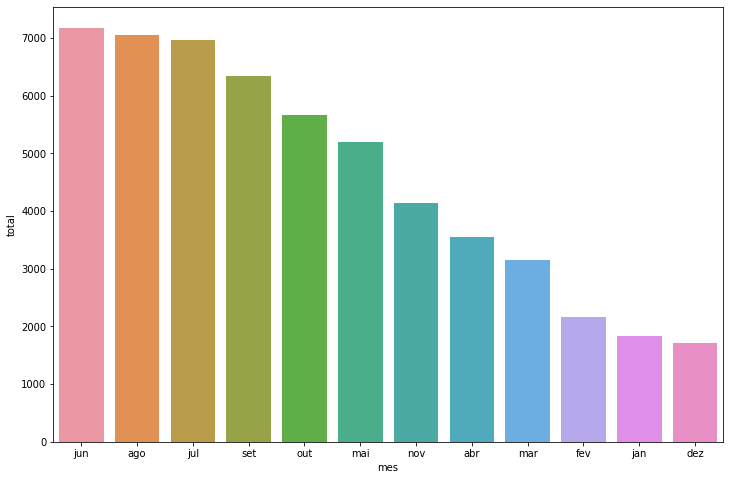

In [75]:
plt.figure(figsize=(12,8)) #Configura o tamanho da figura (12 para direita e 8 para baixo)
sns.barplot(x="mes", y="total", data = freq_sub_mes_chicago)

Text(0.5, 0, 'mes')

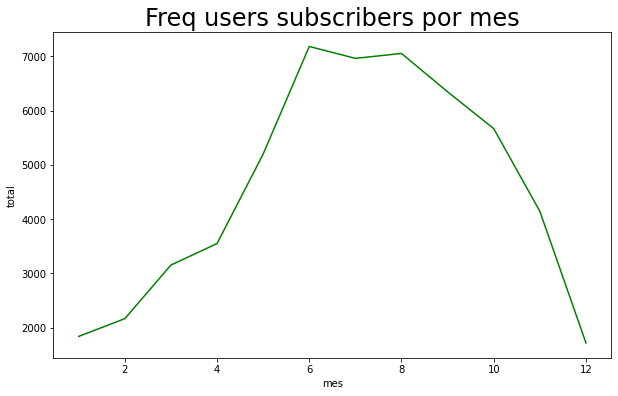

In [76]:
#GRAFICO DE LINHA
plt.figure(figsize=(10,6))
sns.lineplot(data = freq_sub_mes_chicago, x="ordem_mes_chicago", y="total", color = "green")
plt.title( "Freq users subscribers por mes" , size = 24 ) #Define o título do gráfico e define o tamanho
plt.xlabel( "mes" , size = 10 ) #Usa o plt para adicionar um rotulo no eixo x e define o tamanho

**Explorando usuários Customer por mes**

In [77]:
filtro_cust_chicago = df_chicago2['tipo_usuario'] == "Customer" 

In [78]:
customer_chicago = df_chicago2[filtro_cust_chicago]

In [79]:
customer_chicago

,duracao,mes,hora,dia_semana,tipo_usuario
23,21.816667,mar,18,Thursday,Customer
39,22.316667,mar,17,Thursday,Customer
63,26.366667,mar,16,Thursday,Customer
65,12.333333,mar,16,Thursday,Customer
69,25.700000,mar,15,Thursday,Customer
...,...,...,...,...,...
72121,8.650000,out,5,Saturday,Customer
72122,37.366667,out,4,Saturday,Customer
72123,8.850000,out,2,Saturday,Customer
72124,20.366667,out,2,Saturday,Customer


In [80]:
customer_chicago.mes.value_counts()

jul    3323
ago    2757
jun    2612
set    2354
mai    2012
out    1492
abr    1017
nov     667
mar     565
fev     228
jan      62
dez      60
Name: mes, dtype: int64

In [81]:
freq_cust_mes_chicago = customer_chicago.mes.value_counts()

In [82]:
freq_cust_mes_chicago.to_frame() #Transforma uma serie em DataFrame

,mes
jul,3323
ago,2757
jun,2612
set,2354
mai,2012
out,1492
abr,1017
nov,667
mar,565
fev,228


In [83]:
freq_cust_mes_chicago.to_frame().reset_index() #reseta o index, adicionando mais uma coluna

,index,mes
0,jul,3323
1,ago,2757
2,jun,2612
3,set,2354
4,mai,2012
5,out,1492
6,abr,1017
7,nov,667
8,mar,565
9,fev,228


In [84]:
freq_cust_mes_chicago = freq_cust_mes_chicago.to_frame().reset_index() 

In [85]:
freq_cust_mes_chicago.columns = ["mes", "total"] # Renomeia as colunas do DataFrame
freq_cust_mes_chicago

,mes,total
0,jul,3323
1,ago,2757
2,jun,2612
3,set,2354
4,mai,2012
5,out,1492
6,abr,1017
7,nov,667
8,mar,565
9,fev,228


In [86]:
ordem_mes_chicago = [7, 8, 6, 9, 5, 10, 4, 11, 3, 2, 1, 12]
freq_cust_mes_chicago['ordem_mes_chicago'] = ordem_mes_chicago
print(freq_cust_mes_chicago)

    mes  total  ordem_mes_chicago
0   jul   3323                  7
1   ago   2757                  8
2   jun   2612                  6
3   set   2354                  9
4   mai   2012                  5
5   out   1492                 10
6   abr   1017                  4
7   nov    667                 11
8   mar    565                  3
9   fev    228                  2
10  jan     62                  1
11  dez     60                 12


In [87]:
freq_cust_mes_chicago

,mes,total,ordem_mes_chicago
0,jul,3323,7
1,ago,2757,8
2,jun,2612,6
3,set,2354,9
4,mai,2012,5
5,out,1492,10
6,abr,1017,4
7,nov,667,11
8,mar,565,3
9,fev,228,2


In [88]:
freq_cust_mes_chicago.sort_values(by=['ordem_mes_chicago'])

,mes,total,ordem_mes_chicago
10,jan,62,1
9,fev,228,2
8,mar,565,3
6,abr,1017,4
4,mai,2012,5
2,jun,2612,6
0,jul,3323,7
1,ago,2757,8
3,set,2354,9
5,out,1492,10


**Frequencia de usuários "Customer" por mes**

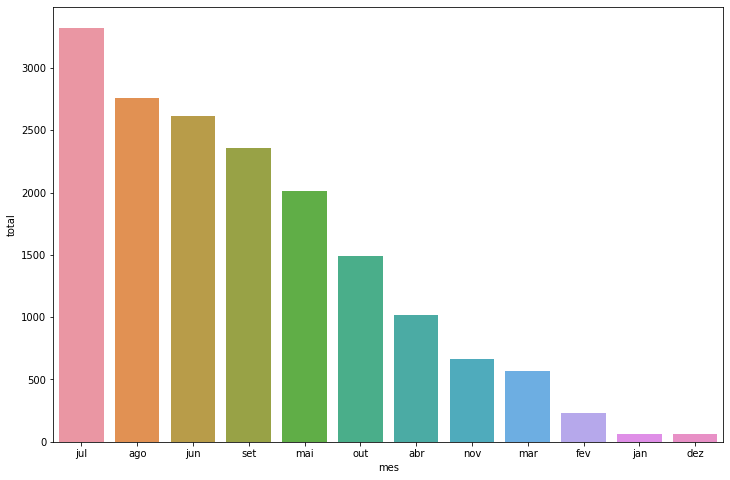

In [89]:
plt.figure(figsize=(12,8)) #Configura o tamanho da figura (12 para direita e 8 para baixo)
sns.barplot(x="mes", y="total", data = freq_cust_mes_chicago)

Text(0.5, 0, 'mes')

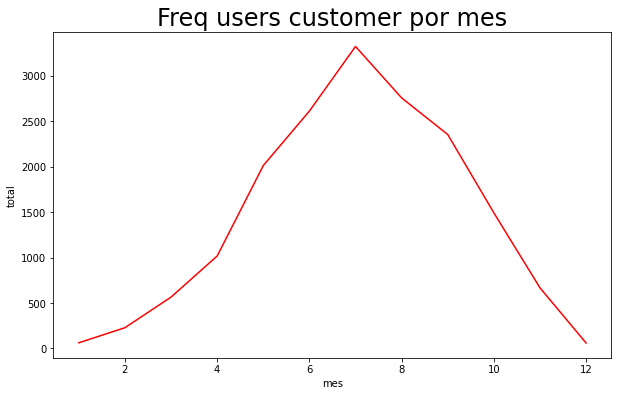

In [90]:
plt.figure(figsize=(10,6))
sns.lineplot(data = freq_cust_mes_chicago, x="ordem_mes_chicago", y="total", color = "red") 
plt.title( "Freq users customer por mes" , size = 24 ) #Define o título do gráfico e define o tamanho
plt.xlabel( "mes" , size = 10 ) #Usa o plt para adicionar um rotulo no eixo x e define o tamanho

**Explorando usuários Subscriber (cadastrado) por hora**

In [91]:
subscriber_chicago.hora.value_counts()

17    7034
8     5200
16    4957
18    4636
7     4119
19    3085
15    3038
12    2709
13    2642
9     2619
14    2414
11    2312
6     1975
10    1897
20    1896
21    1508
22     997
23     581
5      512
0      338
1      215
2      118
4      113
3       67
Name: hora, dtype: int64

In [92]:
freq_sub_hora_chicago = subscriber_chicago.hora.value_counts()

In [93]:
freq_sub_hora_chicago.to_frame() #Transforma uma serie em DataFrame

,hora
17,7034
8,5200
16,4957
18,4636
7,4119
19,3085
15,3038
12,2709
13,2642
9,2619


In [94]:
freq_sub_hora_chicago = freq_sub_hora_chicago.to_frame().reset_index()

In [95]:
freq_sub_hora_chicago.columns = ['hora', 'total']
freq_sub_hora_chicago

,hora,total
0,17,7034
1,8,5200
2,16,4957
3,18,4636
4,7,4119
5,19,3085
6,15,3038
7,12,2709
8,13,2642
9,9,2619


**Frequencia de usuários "Subscriber" por hora**

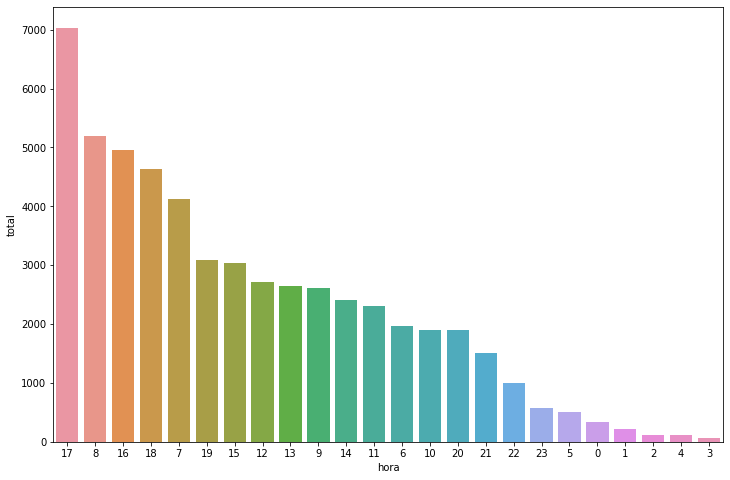

In [96]:
plt.figure(figsize=(12,8))
sns.barplot(x="hora", y="total", data = freq_sub_hora_chicago, order = subscriber_chicago['hora'].value_counts().index )

**Explorando usuários Customer (visitantes) por hora**

In [97]:
filtro_cust_chicago = df_chicago2['tipo_usuario'] == "Customer"

In [98]:
customer_chicago= df_chicago2[filtro_cust_chicago]

In [99]:
customer_chicago.hora.value_counts()

14    1785
15    1701
13    1671
16    1665
17    1530
12    1499
11    1381
18    1150
10     923
19     820
20     623
9      571
21     417
22     349
8      254
23     241
0      144
7      137
1      111
2       57
6       49
5       26
4       24
3       21
Name: hora, dtype: int64

In [100]:
freq_cust_hora_chicago = customer_chicago.hora.value_counts()

In [101]:
freq_cust_hora_chicago.to_frame() #Transforma uma serie em DataFrame

,hora
14,1785
15,1701
13,1671
16,1665
17,1530
12,1499
11,1381
18,1150
10,923
19,820


In [102]:
freq_cust_hora_chicago = freq_cust_hora_chicago.to_frame().reset_index()

In [103]:
freq_cust_hora_chicago.columns = ['hora', 'total']
freq_cust_hora_chicago

,hora,total
0,14,1785
1,15,1701
2,13,1671
3,16,1665
4,17,1530
5,12,1499
6,11,1381
7,18,1150
8,10,923
9,19,820


**Frequencia de usuários "Customer" por hora**

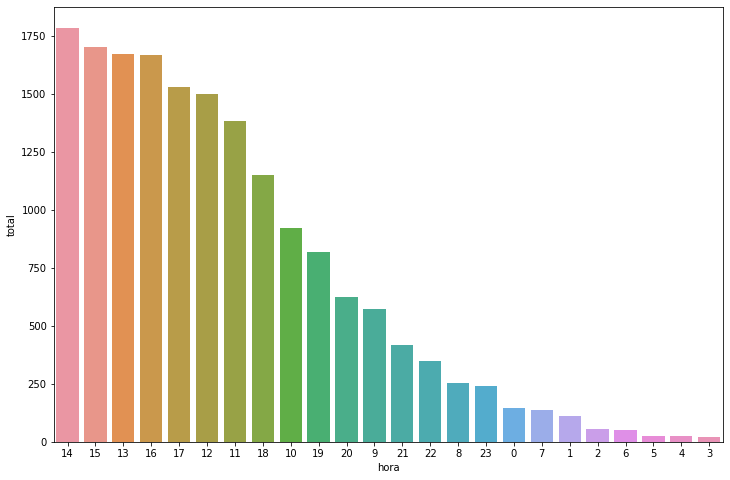

In [104]:
plt.figure(figsize=(12,8))
sns.barplot(x="hora", y="total", data = freq_cust_hora_chicago, order = customer_chicago['hora'].value_counts().index )

**Explorando de usuários (Subscriber) por dia da semana**

In [105]:
subscriber_chicago['dia_semana'].value_counts() #Utilizando o df subscriber_chicago que foi criado anteriormente

Tuesday      9356
Monday       8840
Friday       8648
Thursday     8643
Wednesday    8447
Saturday     5676
Sunday       5372
Name: dia_semana, dtype: int64

In [106]:
freq_sub_dia_chicago = subscriber_chicago['dia_semana'].value_counts()

In [107]:
freq_sub_dia_chicago

Tuesday      9356
Monday       8840
Friday       8648
Thursday     8643
Wednesday    8447
Saturday     5676
Sunday       5372
Name: dia_semana, dtype: int64

In [108]:
freq_sub_dia_chicago.to_frame().reset_index()

,index,dia_semana
0,Tuesday,9356
1,Monday,8840
2,Friday,8648
3,Thursday,8643
4,Wednesday,8447
5,Saturday,5676
6,Sunday,5372


In [109]:
freq_sub_dia_chicago = freq_sub_dia_chicago.to_frame().reset_index()

In [110]:
freq_sub_dia_chicago

,index,dia_semana
0,Tuesday,9356
1,Monday,8840
2,Friday,8648
3,Thursday,8643
4,Wednesday,8447
5,Saturday,5676
6,Sunday,5372


In [111]:
freq_sub_dia_chicago.columns = ['dia', 'total']
freq_sub_dia_chicago

,dia,total
0,Tuesday,9356
1,Monday,8840
2,Friday,8648
3,Thursday,8643
4,Wednesday,8447
5,Saturday,5676
6,Sunday,5372


**Frequencia de usuários (Subscriber) por dia da semana no ano**

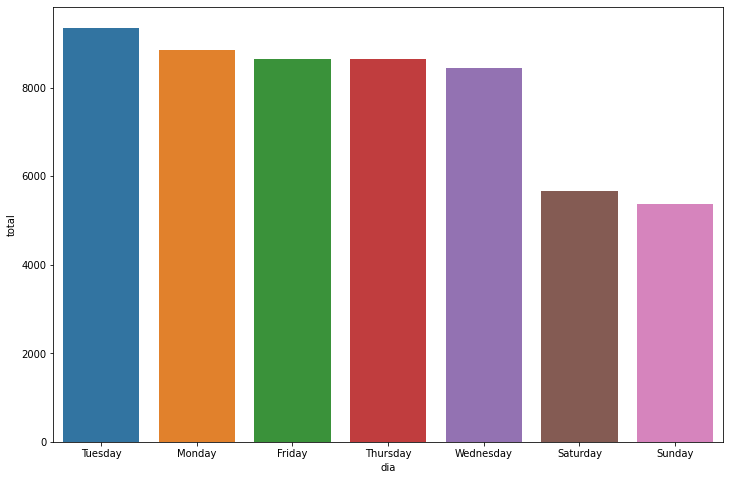

In [112]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = freq_sub_dia_chicago)

**Explorando usuários (Customer) por dia da semana**

In [113]:
customer_chicago['dia_semana'].value_counts() #Utilizando o df customer_chicago que foi criado anteriormente

Sunday       4282
Saturday     4251
Monday       2446
Friday       2093
Tuesday      1555
Thursday     1365
Wednesday    1157
Name: dia_semana, dtype: int64

In [114]:
freq_cust_dia_chicago = customer_chicago['dia_semana'].value_counts()

In [115]:
freq_cust_dia_chicago

Sunday       4282
Saturday     4251
Monday       2446
Friday       2093
Tuesday      1555
Thursday     1365
Wednesday    1157
Name: dia_semana, dtype: int64

In [116]:
freq_cust_dia_chicago.to_frame().reset_index()

,index,dia_semana
0,Sunday,4282
1,Saturday,4251
2,Monday,2446
3,Friday,2093
4,Tuesday,1555
5,Thursday,1365
6,Wednesday,1157


In [117]:
freq_cust_dia_chicago = freq_cust_dia_chicago.to_frame().reset_index()

In [118]:
freq_cust_dia_chicago

,index,dia_semana
0,Sunday,4282
1,Saturday,4251
2,Monday,2446
3,Friday,2093
4,Tuesday,1555
5,Thursday,1365
6,Wednesday,1157


In [119]:
freq_cust_dia_chicago.columns = ['dia', 'total']
freq_cust_dia_chicago

,dia,total
0,Sunday,4282
1,Saturday,4251
2,Monday,2446
3,Friday,2093
4,Tuesday,1555
5,Thursday,1365
6,Wednesday,1157


**Frequencia de usuários (Customer) por dia da semana no ano**



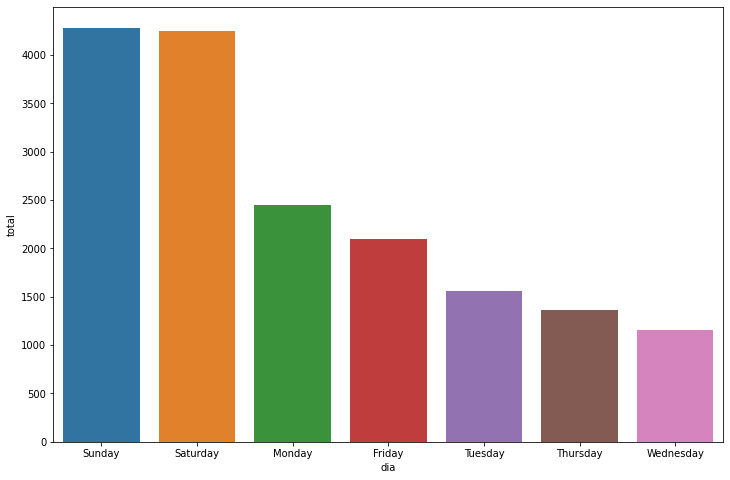

In [120]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = freq_cust_dia_chicago)

**Explorando os dias das semanas do primeiro trimestre (meses) de usuários Subscriber**

**Janeiro**

In [121]:
filtro_sub_jan_chicago = subscriber_chicago['mes'] == "jan"

In [122]:
filtro_sub_jan_chicago = subscriber_chicago[filtro_sub_jan_chicago]

In [123]:
filtro_sub_jan_chicago

,duracao,mes,hora,dia_semana,tipo_usuario
6114,3.133333,jan,21,Sunday,Subscriber
6116,8.900000,jan,20,Sunday,Subscriber
6117,4.533333,jan,20,Sunday,Subscriber
6118,13.583333,jan,19,Sunday,Subscriber
6119,5.750000,jan,18,Sunday,Subscriber
...,...,...,...,...,...
8009,5.233333,jan,10,Friday,Subscriber
8010,16.950000,jan,3,Friday,Subscriber
8011,13.683333,jan,1,Friday,Subscriber
8012,4.750000,jan,1,Friday,Subscriber


In [124]:
filtro_sub_jan_chicago.dia_semana.value_counts()

Thursday     378
Friday       351
Tuesday      274
Wednesday    271
Monday       230
Saturday     202
Sunday       133
Name: dia_semana, dtype: int64

In [125]:
filtro_sub_jan_chicago = filtro_sub_jan_chicago.dia_semana.value_counts().to_frame().reset_index()

In [126]:
filtro_sub_jan_chicago

,index,dia_semana
0,Thursday,378
1,Friday,351
2,Tuesday,274
3,Wednesday,271
4,Monday,230
5,Saturday,202
6,Sunday,133


In [127]:
filtro_sub_jan_chicago.columns = ['dia', 'total']
filtro_sub_jan_chicago

,dia,total
0,Thursday,378
1,Friday,351
2,Tuesday,274
3,Wednesday,271
4,Monday,230
5,Saturday,202
6,Sunday,133


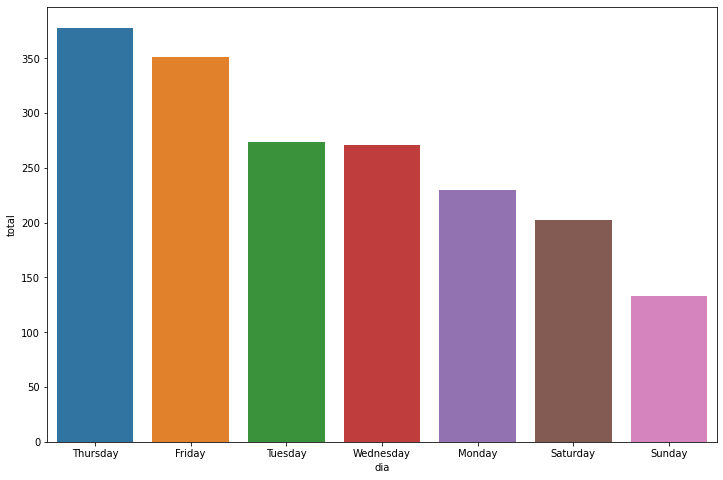

In [128]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = filtro_sub_jan_chicago)

**Fevereiro**

In [129]:
filtro_sub_fev_chicago = subscriber_chicago['mes'] == "fev"

In [130]:
filtro_sub_fev_chicago = subscriber_chicago[filtro_sub_fev_chicago]

In [131]:
filtro_sub_fev_chicago

,duracao,mes,hora,dia_semana,tipo_usuario
3719,13.950000,fev,22,Monday,Subscriber
3720,8.783333,fev,20,Monday,Subscriber
3721,10.750000,fev,20,Monday,Subscriber
3722,5.233333,fev,19,Monday,Subscriber
3723,11.783333,fev,19,Monday,Subscriber
...,...,...,...,...,...
6108,10.700000,fev,6,Monday,Subscriber
6109,6.716667,fev,6,Monday,Subscriber
6110,15.400000,fev,6,Monday,Subscriber
6111,15.233333,fev,5,Monday,Subscriber


In [132]:
filtro_sub_fev_chicago.dia_semana.value_counts()

Monday       428
Thursday     363
Friday       345
Tuesday      296
Wednesday    275
Saturday     261
Sunday       198
Name: dia_semana, dtype: int64

In [133]:
filtro_sub_fev_chicago = filtro_sub_fev_chicago.dia_semana.value_counts().to_frame().reset_index()

In [134]:
filtro_sub_fev_chicago

,index,dia_semana
0,Monday,428
1,Thursday,363
2,Friday,345
3,Tuesday,296
4,Wednesday,275
5,Saturday,261
6,Sunday,198


In [135]:
filtro_sub_fev_chicago.columns = ['dia', 'total']
filtro_sub_fev_chicago

,dia,total
0,Monday,428
1,Thursday,363
2,Friday,345
3,Tuesday,296
4,Wednesday,275
5,Saturday,261
6,Sunday,198


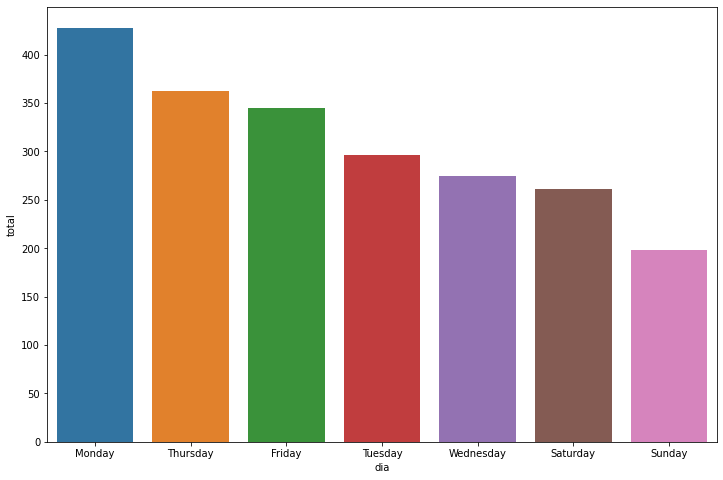

In [136]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = filtro_sub_fev_chicago)

**Março**

In [137]:
filtro_sub_mar_chicago = subscriber_chicago['mes'] == "mar"

In [138]:
filtro_sub_mar_chicago = subscriber_chicago[filtro_sub_mar_chicago]

In [139]:
filtro_sub_mar_chicago

,duracao,mes,hora,dia_semana,tipo_usuario
0,15.433333,mar,23,Thursday,Subscriber
1,3.300000,mar,22,Thursday,Subscriber
2,2.066667,mar,22,Thursday,Subscriber
3,19.683333,mar,22,Thursday,Subscriber
4,10.933333,mar,22,Thursday,Subscriber
...,...,...,...,...,...
3714,4.583333,mar,7,Tuesday,Subscriber
3715,13.000000,mar,7,Tuesday,Subscriber
3716,4.966667,mar,7,Tuesday,Subscriber
3717,6.466667,mar,7,Tuesday,Subscriber


In [140]:
filtro_sub_mar_chicago.dia_semana.value_counts()

Tuesday      666
Wednesday    579
Monday       511
Thursday     488
Friday       440
Saturday     285
Sunday       185
Name: dia_semana, dtype: int64

In [141]:
filtro_sub_mar_chicago = filtro_sub_mar_chicago.dia_semana.value_counts().to_frame().reset_index()

In [142]:
filtro_sub_mar_chicago

,index,dia_semana
0,Tuesday,666
1,Wednesday,579
2,Monday,511
3,Thursday,488
4,Friday,440
5,Saturday,285
6,Sunday,185


In [143]:
filtro_sub_mar_chicago.columns = ['dia', 'total']
filtro_sub_mar_chicago

,dia,total
0,Tuesday,666
1,Wednesday,579
2,Monday,511
3,Thursday,488
4,Friday,440
5,Saturday,285
6,Sunday,185


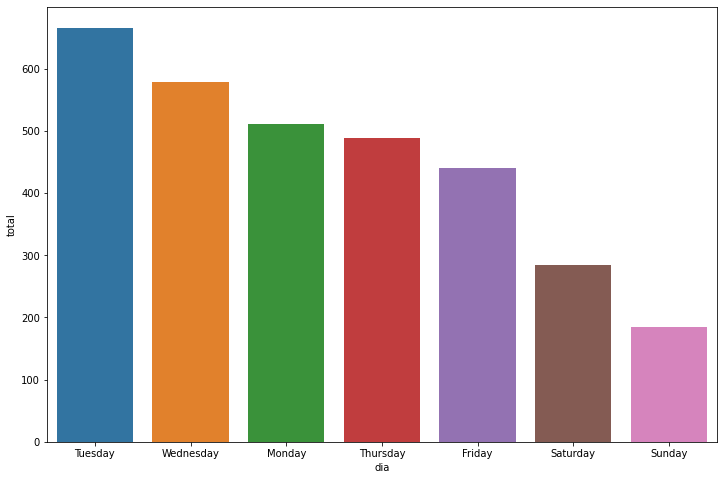

In [144]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = filtro_sub_mar_chicago)

**Explorando os dias das semanas do primeiro trimestre (meses) de usuários Customer**

**Janeiro**

**Fevereiro**

**Março**

### ***Compartilhamento de bicicletas em NY - 2016 (Citibike)***


In [145]:
import pandas as pd #Importa a biblioteca pandas para ler o arquivo
import seaborn as sns #Importa a biblioteca seaborn
import matplotlib.pyplot as plt #Importa a bilbioteca matplotlib
import csv 
import numpy as np
from datetime import datetime #operações para analisar datas

In [146]:
 df_ny = pd.read_csv("NYC-2016-Summary.csv") #Atribui a uma variável 

In [147]:
df_ny

,duration,month,hour,day_of_week,user_type
0,13.983333,1,0,Friday,Customer
1,11.433333,1,0,Friday,Subscriber
2,5.250000,1,0,Friday,Subscriber
3,12.316667,1,0,Friday,Subscriber
4,20.883333,1,0,Friday,Customer
...,...,...,...,...,...
276793,4.916667,12,22,Saturday,Customer
276794,4.616667,12,22,Saturday,Subscriber
276795,10.016667,12,23,Saturday,Subscriber
276796,35.033333,12,23,Saturday,Subscriber


In [148]:
df_ny.shape #Formato da tabela

(276798, 5)

In [149]:
df_ny.columns = ["duracao" , "mes" , "hora" , "dia_semana", "tipo_usuario"] #renomear colunas [] lista (columns é um atributo do pandas)
df_ny.head()

,duracao,mes,hora,dia_semana,tipo_usuario
0,13.983333,1,0,Friday,Customer
1,11.433333,1,0,Friday,Subscriber
2,5.250000,1,0,Friday,Subscriber
3,12.316667,1,0,Friday,Subscriber
4,20.883333,1,0,Friday,Customer


In [150]:
df_ny['mes'].unique() #Todos os valores que foram colocados na coluna mes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [151]:
df_ny['mes'].value_counts() #Quantas vezes em cada mes

9     32699
10    31519
8     31104
6     29242
7     27522
5     24455
11    24148
4     20160
3     18413
12    16186
2     11170
1     10180
Name: mes, dtype: int64

In [152]:
df_ny['dia_semana'].value_counts() #Quantas vezes em cada dia

Wednesday    44629
Thursday     44330
Tuesday      42405
Friday       41389
Monday       39340
Saturday     33353
Sunday       31352
Name: dia_semana, dtype: int64

**Quantidade de viagens por dia no ano de 2016**

In [153]:
qtd_viagem_por_dia_ny = df_ny['dia_semana'].value_counts() #NY

In [154]:
qtd_viagem_por_dia_ny

Wednesday    44629
Thursday     44330
Tuesday      42405
Friday       41389
Monday       39340
Saturday     33353
Sunday       31352
Name: dia_semana, dtype: int64

In [155]:
qtd_viagem_por_dia_ny.to_frame()

,dia_semana
Wednesday,44629
Thursday,44330
Tuesday,42405
Friday,41389
Monday,39340
Saturday,33353
Sunday,31352


In [156]:
df_qtd_viagem_por_dia_ny = qtd_viagem_por_dia_ny.to_frame().reset_index()

In [157]:
df_qtd_viagem_por_dia_ny #Quantidade total de viagens por dia em 2016

,index,dia_semana
0,Wednesday,44629
1,Thursday,44330
2,Tuesday,42405
3,Friday,41389
4,Monday,39340
5,Saturday,33353
6,Sunday,31352


In [158]:
df_qtd_viagem_por_dia_ny.columns = ["dias", "total"]
df_qtd_viagem_por_dia_ny

,dias,total
0,Wednesday,44629
1,Thursday,44330
2,Tuesday,42405
3,Friday,41389
4,Monday,39340
5,Saturday,33353
6,Sunday,31352


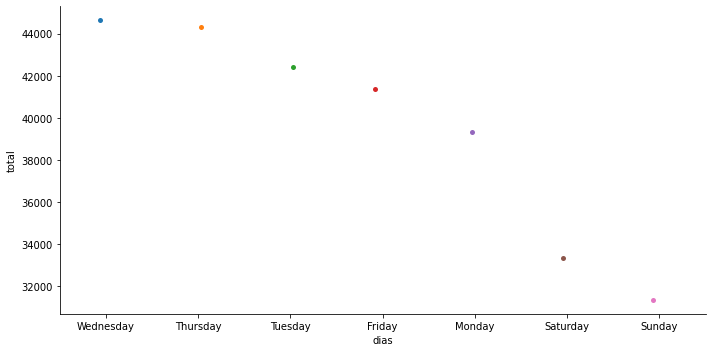

In [159]:
sns.catplot(x="dias", y="total", data = df_qtd_viagem_por_dia_ny, aspect = 2)

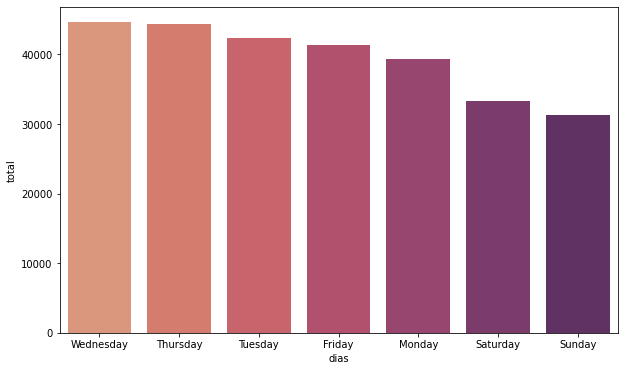

In [160]:
plt.figure(figsize=(10,6)) #Configura o tamanho da figura (10 para direita e 6 para baixo)
sns.barplot(x="dias", y="total", data = df_qtd_viagem_por_dia_ny, palette = "flare") #pallete, atributo que permite escolher um palete de cor, no caso é flare

In [161]:
df_ny.loc[df_ny.tipo_usuario=='Subscriber'].value_counts().sum()

245896

In [162]:
subscriber_ny = df_ny.loc[df_ny.tipo_usuario=='Subscriber'].value_counts().sum()

In [163]:
subscriber_ny

245896

In [164]:
df_ny.loc[df_ny.tipo_usuario=='Customer'].value_counts().sum() #Localiza a coluna tipo_usuario e conta todos que são "Customer" e a função sum, soma tudo.
#Obs: Não sabemos se tem usuário repetido na tabela, vamos usar a abordagem de frequencia para saber se usuários cadastrados são mais frequentes que usuários customizados

30185

In [165]:
customer_ny = df_ny.loc[df_ny.tipo_usuario=='Customer'].value_counts().sum()

In [166]:
customer_ny

30185

Frequencia dos tipos de usuários em relação ao horário

Quartis: Os quartis dividem os dados em quatro partes. Ordenando os dados cada quartil vai possuir 25% das observações. Ou seja, os primeiros 25% das observação estarão até o corte do 1º quartil, os próximos 25% até o corte do 2º quartil, etc.

Limites: O limite inferior é calculado sendo, geralmente, 1,5 vezes o corte do 1º quartil e o limite superior sendo 1,5 vezes o corte do 3º quartil.
O corte do segundo quartil é igual a mediana.

Outliers são observações atípicas, muito afastadas da maioria dos dados. Num boxplot esses valores ficam abaixo do limite inferior ou acima do limite superior.

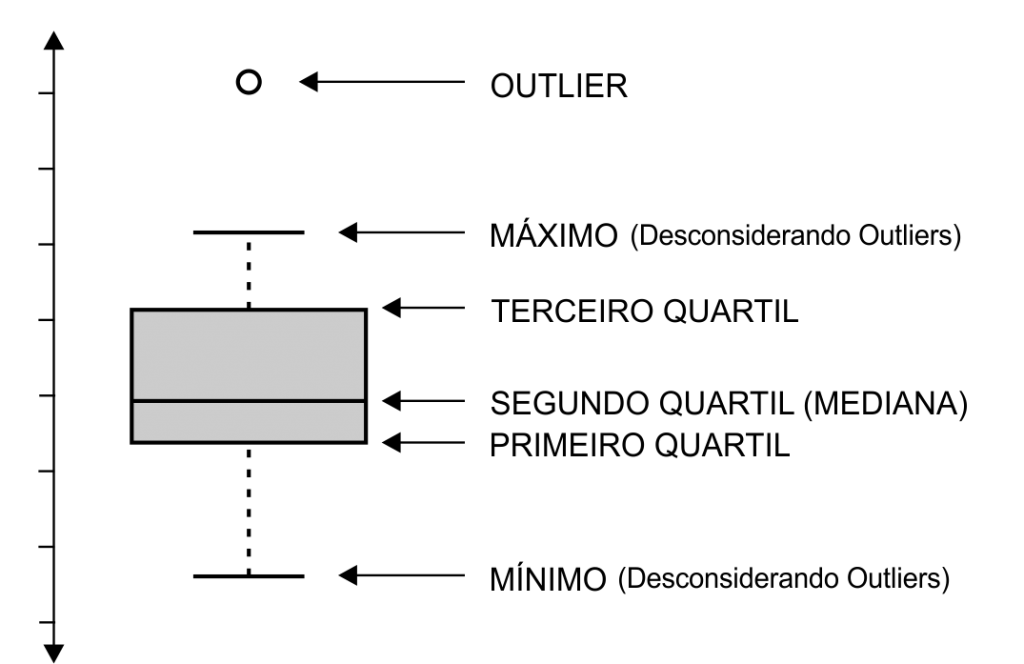

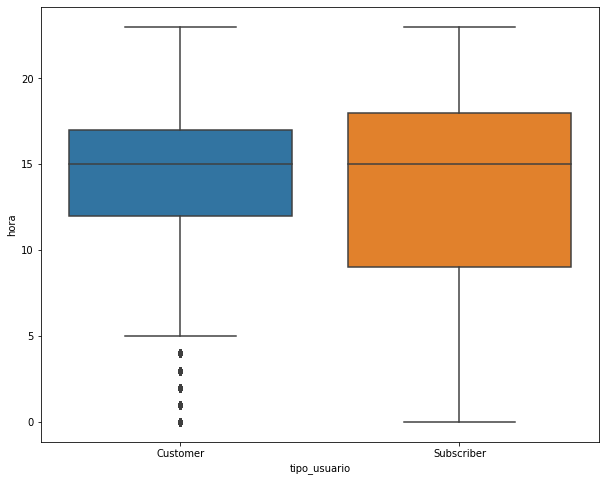

In [167]:
plt.figure(figsize=(10,8)) #Configura o tamanho da figura (10 para direita e 8 para baixo)
sns.boxplot(x="tipo_usuario", y="hora", data = df_ny) 
# Grafico mostra que mostra a frequencia dos tipos de usuários em relação ao horário e o desvio padrão (standart deviation)

In [168]:
df_ny.groupby("tipo_usuario").median()["hora"] # Mediana

tipo_usuario
Customer      15.0
Subscriber    15.0
Name: hora, dtype: float64

Explorando viagens por hora e por mês


In [169]:
#Substitui valores da coluna por condição em pandas
df_ny.loc[df_ny.mes==1, "mes"]='jan'
df_ny.loc[df_ny.mes==2, "mes"]='fev'
df_ny.loc[df_ny.mes==3, "mes"]='mar'
df_ny.loc[df_ny.mes==4, "mes"]='abr'
df_ny.loc[df_ny.mes==5, "mes"]='mai'
df_ny.loc[df_ny.mes==6, "mes"]='jun'
df_ny.loc[df_ny.mes==7, "mes"]='jul'
df_ny.loc[df_ny.mes==8, "mes"]='ago'
df_ny.loc[df_ny.mes==9, "mes"]='set'
df_ny.loc[df_ny.mes==10, "mes"]='out'
df_ny.loc[df_ny.mes==11, "mes"]='nov'
df_ny.loc[df_ny.mes==12, "mes"]='dez'

In [170]:
df_ny['mes'].value_counts() #Quantidade de viagens por mes em New York

set    32699
out    31519
ago    31104
jun    29242
jul    27522
mai    24455
nov    24148
abr    20160
mar    18413
dez    16186
fev    11170
jan    10180
Name: mes, dtype: int64

In [171]:
qtd_viagem_mes_ny = df_ny['mes'].value_counts() 

In [172]:
qtd_viagem_mes_ny = qtd_viagem_mes_ny.to_frame().reset_index()

In [173]:
qtd_viagem_mes_ny

,index,mes
0,set,32699
1,out,31519
2,ago,31104
3,jun,29242
4,jul,27522
5,mai,24455
6,nov,24148
7,abr,20160
8,mar,18413
9,dez,16186


In [174]:
qtd_viagem_mes_ny.columns = ["mes", "total"]
qtd_viagem_mes_ny

,mes,total
0,set,32699
1,out,31519
2,ago,31104
3,jun,29242
4,jul,27522
5,mai,24455
6,nov,24148
7,abr,20160
8,mar,18413
9,dez,16186


Análise geral por mes (todos os usuários, customer e subscriber)

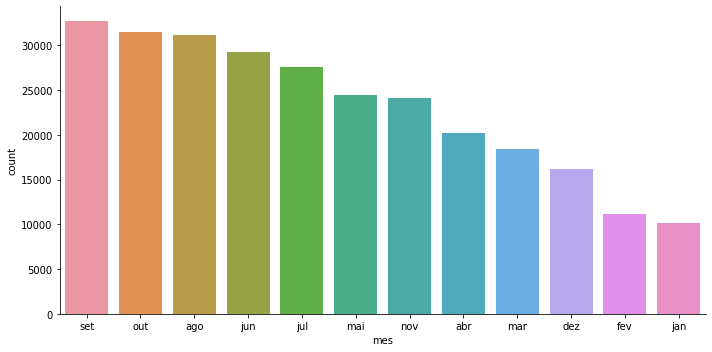

In [175]:
sns.catplot(x="mes", kind="count", data = df_ny, aspect = 2, order = df_ny['mes'].value_counts().index) 
# usando alto nível, o sns.catplot vai plotar categoricamente as categorias de "mes", de maneira que conte (kind="count") quantas vezes aparece, e o data = df_chicago (está usando o DF df_chicago que importamos)
# aspect configura o tamanho da figura, colocando o 2 para trazer o dobro (retangulo) do quadrado.
# E o order define a ordem como é apresentado o gráfico, no caso é a ordem da série df_chicago['mes'].value_counts().index e o ".index" é o indice que está definida a ordem. index da série.

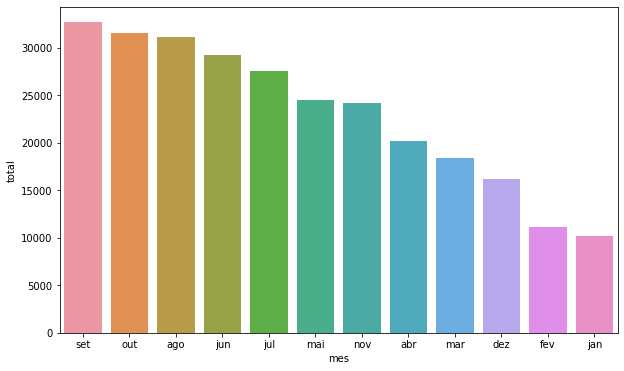

In [176]:
plt.figure(figsize=(10,6)) #Configura o tamanho da figura (10 para direita e 6 para baixo)
sns.barplot(x="mes", y="total", data = qtd_viagem_mes_ny)

Explorando por horário (todos os usuários)

In [177]:
df_ny['hora'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [178]:
df_ny['hora'].value_counts() #Quantidade de viagens no ano de 2016 por horário

17    27199
18    26102
8     22550
16    19871
19    17679
9     17649
15    16839
14    16164
13    15696
12    14694
7     13036
11    12871
20    12190
10    12150
21     8493
22     6205
6      6001
23     4301
0      2441
5      1570
1      1373
2       717
3       504
4       503
Name: hora, dtype: int64

In [179]:
qtd_viagem_hora_ny = df_ny['hora'].value_counts()

In [180]:
qtd_viagem_hora_ny

17    27199
18    26102
8     22550
16    19871
19    17679
9     17649
15    16839
14    16164
13    15696
12    14694
7     13036
11    12871
20    12190
10    12150
21     8493
22     6205
6      6001
23     4301
0      2441
5      1570
1      1373
2       717
3       504
4       503
Name: hora, dtype: int64

In [181]:
qtd_viagem_hora_ny.to_frame().reset_index()

,index,hora
0,17,27199
1,18,26102
2,8,22550
3,16,19871
4,19,17679
5,9,17649
6,15,16839
7,14,16164
8,13,15696
9,12,14694


In [182]:
qtd_viagem_hora_ny = qtd_viagem_hora_ny.to_frame().reset_index()

In [183]:
qtd_viagem_hora_ny

,index,hora
0,17,27199
1,18,26102
2,8,22550
3,16,19871
4,19,17679
5,9,17649
6,15,16839
7,14,16164
8,13,15696
9,12,14694


In [184]:
qtd_viagem_hora_ny.columns = ["hora", "total"]
qtd_viagem_hora_ny

,hora,total
0,17,27199
1,18,26102
2,8,22550
3,16,19871
4,19,17679
5,9,17649
6,15,16839
7,14,16164
8,13,15696
9,12,14694


**Analise por hora de todos os usuários**

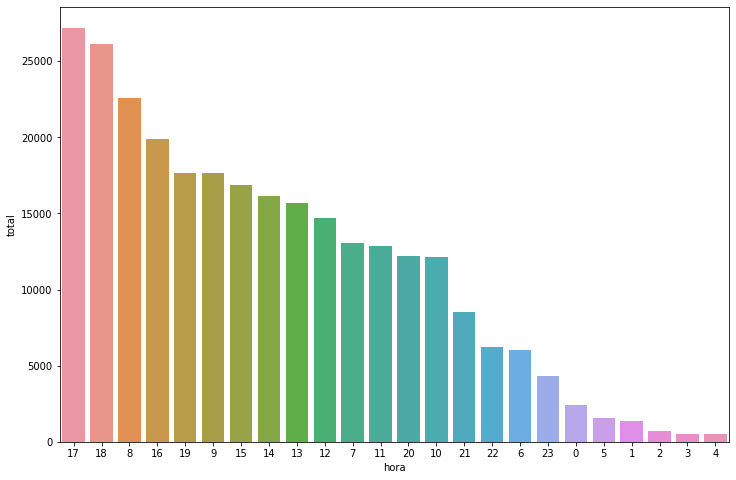

In [185]:
plt.figure(figsize=(12,8)) #Configura o tamanho da figura (12 para direita e 8 para baixo)
sns.barplot(x="hora", y="total", data = qtd_viagem_hora_ny, order = df_ny['hora'].value_counts().index)
# Quantidade total de viagens de todos os usuários por horário

**Quantidade ou frequencia de usuários por categoria (Subscriber e Customer)**

In [186]:
subscriber_ny = df_ny.loc[df_ny.tipo_usuario=='Subscriber'].value_counts().sum()

In [187]:
subscriber_ny

245896

In [188]:
customer_ny = df_ny.loc[df_ny.tipo_usuario=='Customer'].value_counts().sum()

In [189]:
customer_ny

30185

In [190]:
df_usuarios_ny = {
    'tipo' : ['subscriber', 'customer'],
    'total' : [subscriber_ny, customer_ny]
    # {} dicionário do python
}

df_usuarios_ny

{'tipo': ['subscriber', 'customer'], 'total': [245896, 30185]}

In [191]:
pd.DataFrame(df_usuarios_ny) #Cria ou transforma em dataframe em cima de 'df_usuarios_chicago' que acabei de criar como dicionario

,tipo,total
0,subscriber,245896
1,customer,30185


In [192]:
df_usuarios_ny = pd.DataFrame(df_usuarios_ny) #É um costume sobrescrever a variável, mas não é necessário
df_usuarios_ny

,tipo,total
0,subscriber,245896
1,customer,30185


**Analise de frequencia ou quantidades de usuarios**

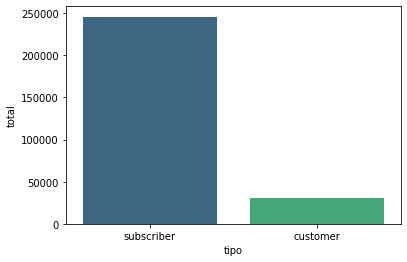

In [193]:
sns.barplot(x="tipo", y="total", data = df_usuarios_ny, palette = "viridis") #Gráfico de barras com seaborn, definindo o "tipo" no eixo x e o "total" no eixo y, extraido do DF df_usuarios_chicago


Duração média de viagem por tipo de usuário

In [194]:
df_ny.groupby("tipo_usuario").mean()["duracao"] # Duração média por tipo de usuário

tipo_usuario
Customer      32.982004
Subscriber    13.680791
Name: duracao, dtype: float64

In [195]:
df_ny.groupby("tipo_usuario").mean()["duracao"].to_frame().reset_index()

,tipo_usuario,duracao
0,Customer,32.982004
1,Subscriber,13.680791


In [196]:
df_media_viagem_users_ny = df_ny.groupby("tipo_usuario").mean()["duracao"].to_frame().reset_index()

In [197]:
df_media_viagem_users_ny

,tipo_usuario,duracao
0,Customer,32.982004
1,Subscriber,13.680791


In [198]:
df_media_viagem_users_ny.columns = ['users', 'duracao']

In [199]:
df_media_viagem_users_ny

,users,duracao
0,Customer,32.982004
1,Subscriber,13.680791


In [200]:
df_media_viagem_users_ny.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2.5px solid black')]}])

,users,duracao
0,Customer,32.982004
1,Subscriber,13.680791


Mediana de viagem por tipo de usuário

In [201]:
df_ny.groupby("tipo_usuario").median()["duracao"] # Mediana

tipo_usuario
Customer      21.233333
Subscriber     9.716667
Name: duracao, dtype: float64

In [202]:
df_mediana_viagem_users_ny = df_ny.groupby("tipo_usuario").median()["duracao"].to_frame().reset_index()

In [203]:
df_mediana_viagem_users_ny

,tipo_usuario,duracao
0,Customer,21.233333
1,Subscriber,9.716667


In [204]:
df_mediana_viagem_users_ny.columns = ['users', 'duracao']

In [205]:
df_mediana_viagem_users_ny.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2.5px solid black')]}])

,users,duracao
0,Customer,21.233333
1,Subscriber,9.716667


Explorando a frequencia (mes e hora) de usuários customizados e usuários cadastrados

In [206]:
total_tipo_usuarios_ny = df_ny.tipo_usuario.value_counts()

In [207]:
total_tipo_usuarios_ny

Subscriber    245896
Customer       30185
Name: tipo_usuario, dtype: int64

In [208]:
df_ny2 = df_ny.copy() #Cria uma cópia do df_ny_copy

In [209]:
df_ny2

,duracao,mes,hora,dia_semana,tipo_usuario
0,13.983333,jan,0,Friday,Customer
1,11.433333,jan,0,Friday,Subscriber
2,5.250000,jan,0,Friday,Subscriber
3,12.316667,jan,0,Friday,Subscriber
4,20.883333,jan,0,Friday,Customer
...,...,...,...,...,...
276793,4.916667,dez,22,Saturday,Customer
276794,4.616667,dez,22,Saturday,Subscriber
276795,10.016667,dez,23,Saturday,Subscriber
276796,35.033333,dez,23,Saturday,Subscriber


Obs: O Pandas permite filtrar um DataFrame pelos dados de sua coluna. Por exemplo, queremos pegar do data frame de chicago a coluna que define o tipe de usuario e com base nisso, queremos as linhas que são iguais a "Subscriber"

**Criando um DF para usuários Subscriber e outro para Customer**

**Explorando  usuários Subscriber por mes**

In [210]:
filtro_sub_ny = df_ny2['tipo_usuario'] == "Subscriber"

In [211]:
subscriber_ny= df_ny2[filtro_sub_ny]

In [212]:
subscriber_ny

,duracao,mes,hora,dia_semana,tipo_usuario
1,11.433333,jan,0,Friday,Subscriber
2,5.250000,jan,0,Friday,Subscriber
3,12.316667,jan,0,Friday,Subscriber
5,8.750000,jan,0,Friday,Subscriber
6,10.983333,jan,0,Friday,Subscriber
...,...,...,...,...,...
276792,9.350000,dez,22,Saturday,Subscriber
276794,4.616667,dez,22,Saturday,Subscriber
276795,10.016667,dez,23,Saturday,Subscriber
276796,35.033333,dez,23,Saturday,Subscriber


In [213]:
subscriber_ny.mes.value_counts()

set    28306
out    28139
ago    26692
jun    26106
jul    23545
nov    22109
mai    21246
abr    17528
mar    16535
dez    15397
fev    10601
jan     9692
Name: mes, dtype: int64

In [214]:
freq_sub_mes_ny = subscriber_ny.mes.value_counts()

In [215]:
freq_sub_mes_ny.to_frame() #Transforma uma serie em DataFrame

,mes
set,28306
out,28139
ago,26692
jun,26106
jul,23545
nov,22109
mai,21246
abr,17528
mar,16535
dez,15397


In [216]:
freq_sub_mes_ny.to_frame().reset_index() #reseta o index, adicionando mais uma coluna

,index,mes
0,set,28306
1,out,28139
2,ago,26692
3,jun,26106
4,jul,23545
5,nov,22109
6,mai,21246
7,abr,17528
8,mar,16535
9,dez,15397


In [217]:
freq_sub_mes_ny = freq_sub_mes_ny.to_frame().reset_index()

In [218]:
freq_sub_mes_ny.columns = ["mes", "total"] # Renomeia as colunas do DataFrame
freq_sub_mes_ny

,mes,total
0,set,28306
1,out,28139
2,ago,26692
3,jun,26106
4,jul,23545
5,nov,22109
6,mai,21246
7,abr,17528
8,mar,16535
9,dez,15397


In [219]:
# Acrescentando mais uma coluna de acordo com os meses, ex jun é mes 6, janeiro é mes 1, levando-se em conta a ordem da celula anterior
ordem_mes_ny = [9, 10, 8, 6, 7, 11, 5, 4, 3, 12, 2, 1] # Adicionando o valores na coluna que será atribuida ao DF
freq_sub_mes_ny['ordem_mes_ny'] = ordem_mes_ny # Atribuindo 'ordem_mes_chicago' ao DF freq_sub_mes_chicago 
print(freq_sub_mes_ny) #imprime na tela

    mes  total  ordem_mes_ny
0   set  28306             9
1   out  28139            10
2   ago  26692             8
3   jun  26106             6
4   jul  23545             7
5   nov  22109            11
6   mai  21246             5
7   abr  17528             4
8   mar  16535             3
9   dez  15397            12
10  fev  10601             2
11  jan   9692             1


In [220]:
freq_sub_mes_ny

,mes,total,ordem_mes_ny
0,set,28306,9
1,out,28139,10
2,ago,26692,8
3,jun,26106,6
4,jul,23545,7
5,nov,22109,11
6,mai,21246,5
7,abr,17528,4
8,mar,16535,3
9,dez,15397,12


In [221]:
freq_sub_mes_ny.sort_values(by=['ordem_mes_ny']) # Com o parametro sort_values, ordena os valores de acordo com a coluna 'ordem_mes_chicago'

,mes,total,ordem_mes_ny
11,jan,9692,1
10,fev,10601,2
8,mar,16535,3
7,abr,17528,4
6,mai,21246,5
3,jun,26106,6
4,jul,23545,7
2,ago,26692,8
0,set,28306,9
1,out,28139,10


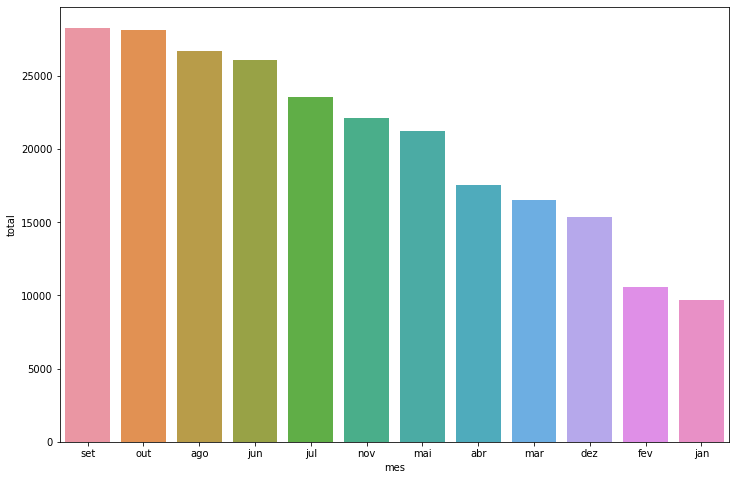

In [222]:
plt.figure(figsize=(12,8)) #Configura o tamanho da figura (12 para direita e 8 para baixo)
sns.barplot(x="mes", y="total", data = freq_sub_mes_ny)

Text(0.5, 0, 'mes')

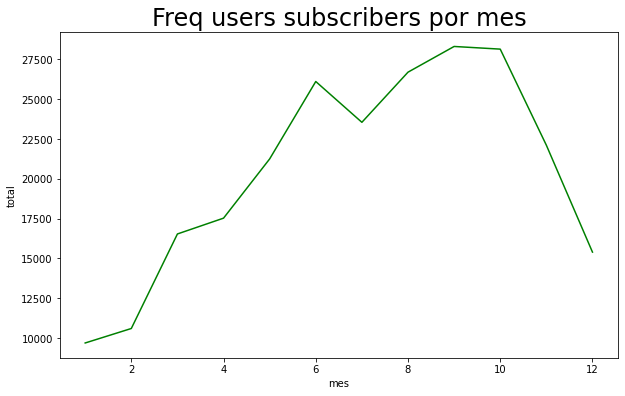

In [223]:
#GRAFICO DE LINHA
plt.figure(figsize=(10,6))
sns.lineplot(data = freq_sub_mes_ny, x="ordem_mes_ny", y="total", color = "green")
plt.title( "Freq users subscribers por mes" , size = 24 ) #Define o título do gráfico e define o tamanho
plt.xlabel( "mes" , size = 10 ) #Usa o plt para adicionar um rotulo no eixo x e define o tamanho

**Explorando usuários Customer por mes**

In [224]:
filtro_cust_ny = df_ny2['tipo_usuario'] == "Customer" 

In [225]:
customer_ny = df_ny2[filtro_cust_ny]

In [226]:
customer_ny

,duracao,mes,hora,dia_semana,tipo_usuario
0,13.983333,jan,0,Friday,Customer
4,20.883333,jan,0,Friday,Customer
9,7.083333,jan,1,Friday,Customer
25,16.400000,jan,3,Friday,Customer
27,23.700000,jan,4,Friday,Customer
...,...,...,...,...,...
276754,20.550000,dez,18,Saturday,Customer
276757,14.033333,dez,18,Saturday,Customer
276772,25.550000,dez,20,Saturday,Customer
276785,27.333333,dez,21,Saturday,Customer


In [227]:
customer_ny.mes.value_counts()

ago    4412
set    4393
jul    3977
mai    3209
jun    3136
out    3006
abr    2632
mar    1878
nov    1799
dez     686
fev     569
jan     488
Name: mes, dtype: int64

In [228]:
freq_cust_mes_ny = customer_ny.mes.value_counts()

In [229]:
freq_cust_mes_ny.to_frame() #Transforma uma serie em DataFrame

,mes
ago,4412
set,4393
jul,3977
mai,3209
jun,3136
out,3006
abr,2632
mar,1878
nov,1799
dez,686


In [230]:
freq_cust_mes_ny.to_frame().reset_index() #reseta o index, adicionando mais uma coluna

,index,mes
0,ago,4412
1,set,4393
2,jul,3977
3,mai,3209
4,jun,3136
5,out,3006
6,abr,2632
7,mar,1878
8,nov,1799
9,dez,686


In [231]:
freq_cust_mes_ny = freq_cust_mes_ny.to_frame().reset_index() 

In [232]:
freq_cust_mes_ny.columns = ["mes", "total"] # Renomeia as colunas do DataFrame
freq_cust_mes_ny

,mes,total
0,ago,4412
1,set,4393
2,jul,3977
3,mai,3209
4,jun,3136
5,out,3006
6,abr,2632
7,mar,1878
8,nov,1799
9,dez,686


In [233]:
ordem_mes_ny = [8, 9, 7, 5, 6, 10, 4, 3, 11, 12, 2, 1]
freq_cust_mes_ny['ordem_mes_ny'] = ordem_mes_ny
print(freq_cust_mes_ny)

    mes  total  ordem_mes_ny
0   ago   4412             8
1   set   4393             9
2   jul   3977             7
3   mai   3209             5
4   jun   3136             6
5   out   3006            10
6   abr   2632             4
7   mar   1878             3
8   nov   1799            11
9   dez    686            12
10  fev    569             2
11  jan    488             1


In [234]:
freq_cust_mes_ny

,mes,total,ordem_mes_ny
0,ago,4412,8
1,set,4393,9
2,jul,3977,7
3,mai,3209,5
4,jun,3136,6
5,out,3006,10
6,abr,2632,4
7,mar,1878,3
8,nov,1799,11
9,dez,686,12


In [235]:
freq_cust_mes_ny.sort_values(by=['ordem_mes_ny'])

,mes,total,ordem_mes_ny
11,jan,488,1
10,fev,569,2
7,mar,1878,3
6,abr,2632,4
3,mai,3209,5
4,jun,3136,6
2,jul,3977,7
0,ago,4412,8
1,set,4393,9
5,out,3006,10


**Frequencia de usuários "Customer" por mes**

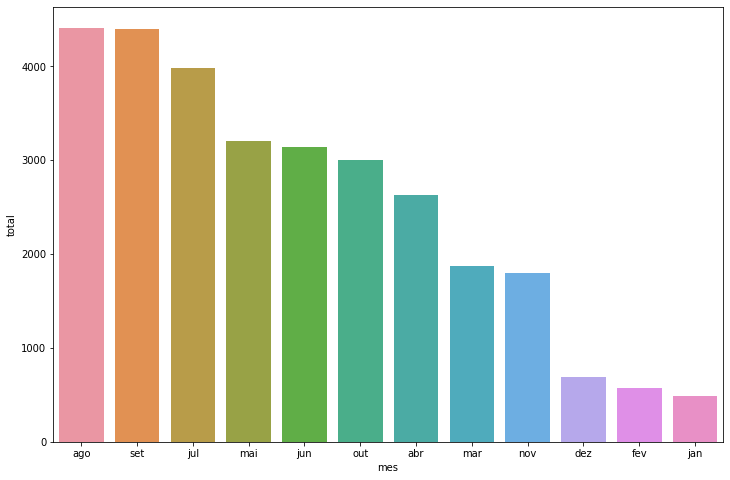

In [236]:
plt.figure(figsize=(12,8)) #Configura o tamanho da figura (12 para direita e 8 para baixo)
sns.barplot(x="mes", y="total", data = freq_cust_mes_ny)

Text(0.5, 0, 'mes')

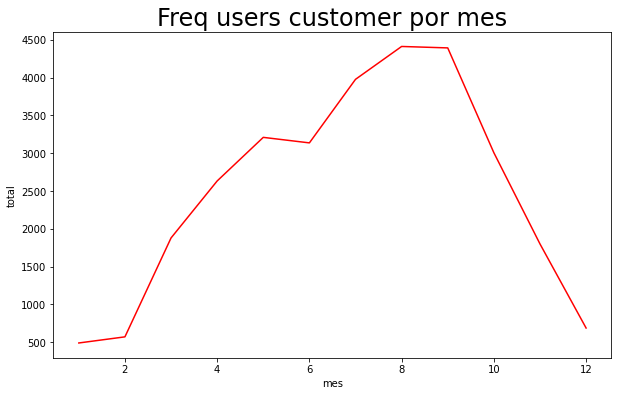

In [237]:
plt.figure(figsize=(10,6))
sns.lineplot(data = freq_cust_mes_ny, x="ordem_mes_ny", y="total", color = "red") 
plt.title( "Freq users customer por mes" , size = 24 ) #Define o título do gráfico e define o tamanho
plt.xlabel( "mes" , size = 10 ) #Usa o plt para adicionar um rotulo no eixo x e define o tamanho

**Explorando usuários Subscriber (cadastrado) por hora**

In [238]:
subscriber_ny.hora.value_counts()

17    24472
18    23859
8     21935
16    16781
9     16655
19    16178
15    13673
14    13109
7     12771
13    12765
12    11991
20    11150
10    10518
11    10451
21     7771
6      5907
22     5631
23     3874
0      2159
5      1531
1      1179
2       634
4       460
3       442
Name: hora, dtype: int64

In [239]:
freq_sub_hora_ny= subscriber_ny.hora.value_counts()

In [240]:
freq_sub_hora_ny.to_frame() #Transforma uma serie em DataFrame

,hora
17,24472
18,23859
8,21935
16,16781
9,16655
19,16178
15,13673
14,13109
7,12771
13,12765


In [241]:
freq_sub_hora_ny = freq_sub_hora_ny.to_frame().reset_index()

In [242]:
freq_sub_hora_ny.columns = ['hora', 'total']
freq_sub_hora_ny

,hora,total
0,17,24472
1,18,23859
2,8,21935
3,16,16781
4,9,16655
5,19,16178
6,15,13673
7,14,13109
8,7,12771
9,13,12765


Frequencia de usuários "Subscriber" por hora

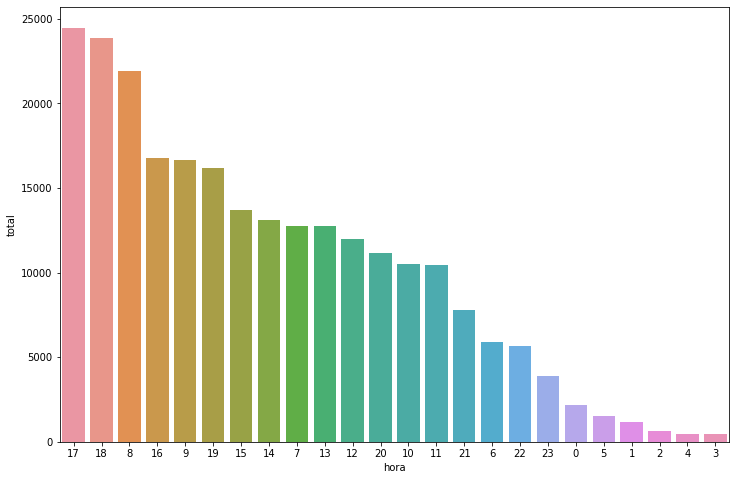

In [243]:
plt.figure(figsize=(12,8))
sns.barplot(x="hora", y="total", data = freq_sub_hora_ny, order = subscriber_ny['hora'].value_counts().index )

Explorando usuários Customer (visitantes) por hora

In [244]:
filtro_cust_ny = df_ny['tipo_usuario'] == "Customer"

In [245]:
customer_ny= df_ny[filtro_cust_ny]

In [246]:
customer_ny.hora.value_counts()

15    3096
16    3009
14    2985
13    2864
17    2656
12    2644
11    2359
18    2203
10    1590
19    1479
20    1022
9      966
21     704
8      597
22     561
23     414
0      275
7      256
1      188
6       93
2       82
3       60
4       43
5       39
Name: hora, dtype: int64

In [247]:
freq_cust_hora_ny = customer_ny.hora.value_counts()

In [248]:
freq_cust_hora_ny.to_frame() #Transforma uma serie em DataFrame

,hora
15,3096
16,3009
14,2985
13,2864
17,2656
12,2644
11,2359
18,2203
10,1590
19,1479


In [249]:
freq_cust_hora_ny = freq_cust_hora_ny.to_frame().reset_index()

In [250]:
freq_cust_hora_ny.columns = ['hora', 'total']
freq_cust_hora_ny

,hora,total
0,15,3096
1,16,3009
2,14,2985
3,13,2864
4,17,2656
5,12,2644
6,11,2359
7,18,2203
8,10,1590
9,19,1479


Frequencia de usuários "Customer" por horaFrequencia de usuários "Customer" por hora

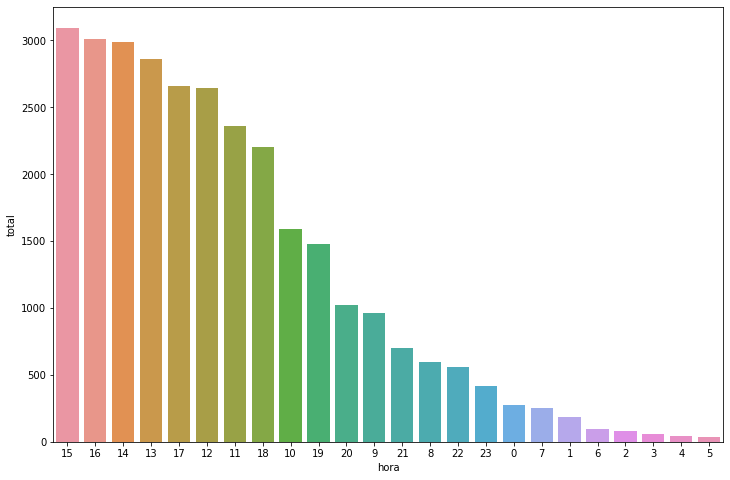

In [251]:
plt.figure(figsize=(12,8))
sns.barplot(x="hora", y="total", data = freq_cust_hora_ny, order = customer_ny['hora'].value_counts().index )

Explorando de usuários (Subscriber) por dia da semana

In [252]:
subscriber_ny['dia_semana'].value_counts() #Utilizando o df subscriber_chicago que foi criado anteriormente

Wednesday    41403
Thursday     41197
Tuesday      39487
Friday       37606
Monday       35623
Saturday     26126
Sunday       24454
Name: dia_semana, dtype: int64

In [253]:
freq_sub_dia_ny = subscriber_ny['dia_semana'].value_counts()

In [254]:
freq_sub_dia_ny


Wednesday    41403
Thursday     41197
Tuesday      39487
Friday       37606
Monday       35623
Saturday     26126
Sunday       24454
Name: dia_semana, dtype: int64

In [255]:
freq_sub_dia_ny.to_frame().reset_index()

,index,dia_semana
0,Wednesday,41403
1,Thursday,41197
2,Tuesday,39487
3,Friday,37606
4,Monday,35623
5,Saturday,26126
6,Sunday,24454


In [256]:
freq_sub_dia_ny = freq_sub_dia_ny.to_frame().reset_index()

In [257]:
freq_sub_dia_ny

,index,dia_semana
0,Wednesday,41403
1,Thursday,41197
2,Tuesday,39487
3,Friday,37606
4,Monday,35623
5,Saturday,26126
6,Sunday,24454


In [258]:
freq_sub_dia_ny.columns = ['dia', 'total']
freq_sub_dia_ny

,dia,total
0,Wednesday,41403
1,Thursday,41197
2,Tuesday,39487
3,Friday,37606
4,Monday,35623
5,Saturday,26126
6,Sunday,24454


Frequencia de usuários (Subscriber) por dia da semana no ano

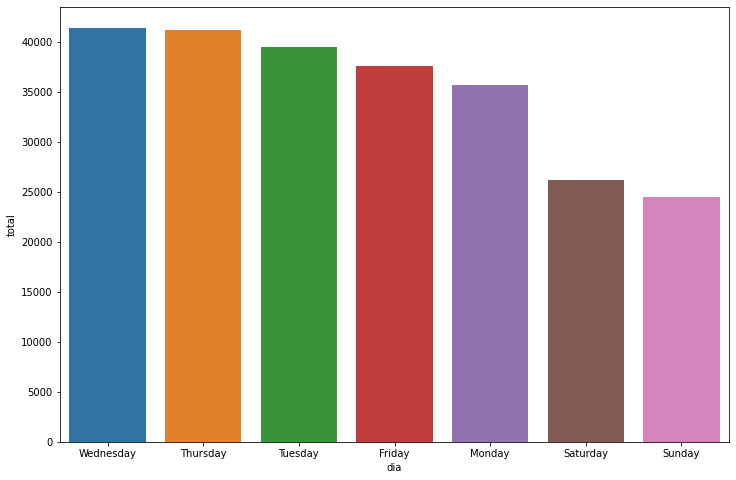

In [259]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = freq_sub_dia_ny)

Explorando usuários (Customer) por dia da semana

In [260]:
customer_ny['dia_semana'].value_counts() #Utilizando o df customer_chicago que foi criado anteriormente

Saturday     7069
Sunday       6776
Friday       3670
Monday       3620
Wednesday    3152
Thursday     3065
Tuesday      2833
Name: dia_semana, dtype: int64

In [261]:
freq_cust_dia_ny = customer_ny['dia_semana'].value_counts()

In [262]:
freq_cust_dia_ny

Saturday     7069
Sunday       6776
Friday       3670
Monday       3620
Wednesday    3152
Thursday     3065
Tuesday      2833
Name: dia_semana, dtype: int64

In [263]:
freq_cust_dia_ny.to_frame().reset_index()

,index,dia_semana
0,Saturday,7069
1,Sunday,6776
2,Friday,3670
3,Monday,3620
4,Wednesday,3152
5,Thursday,3065
6,Tuesday,2833


In [264]:
freq_cust_dia_ny = freq_cust_dia_ny.to_frame().reset_index()

In [265]:
freq_cust_dia_ny

,index,dia_semana
0,Saturday,7069
1,Sunday,6776
2,Friday,3670
3,Monday,3620
4,Wednesday,3152
5,Thursday,3065
6,Tuesday,2833


In [266]:
freq_cust_dia_ny.columns = ['dia', 'total']
freq_cust_dia_ny

,dia,total
0,Saturday,7069
1,Sunday,6776
2,Friday,3670
3,Monday,3620
4,Wednesday,3152
5,Thursday,3065
6,Tuesday,2833


Frequencia de usuários (Customer) por dia da semana no ano

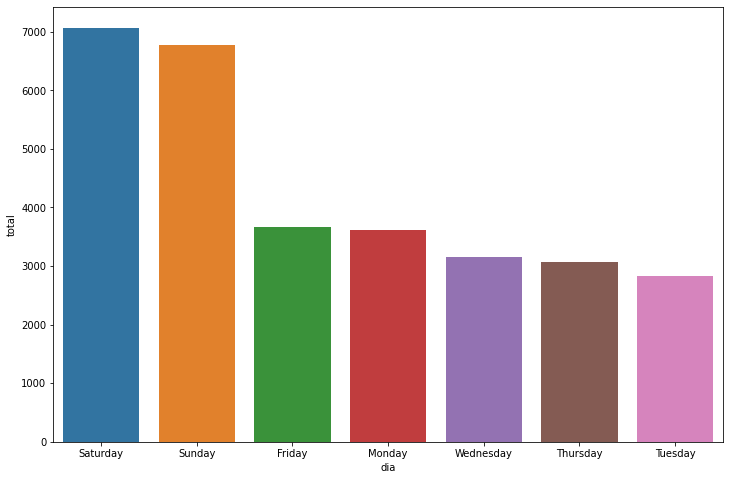

In [267]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = freq_cust_dia_ny)

Explorando os dias das semanas do primeiro trimestre (meses) de usuários Subscriber

janeiro

In [268]:
filtro_sub_jan_ny = subscriber_ny['mes'] == "jan"



In [269]:
filtro_sub_jan_ny = subscriber_ny[filtro_sub_jan_ny]

In [270]:
filtro_sub_jan_ny

,duracao,mes,hora,dia_semana,tipo_usuario
1,11.433333,jan,0,Friday,Subscriber
2,5.250000,jan,0,Friday,Subscriber
3,12.316667,jan,0,Friday,Subscriber
5,8.750000,jan,0,Friday,Subscriber
6,10.983333,jan,0,Friday,Subscriber
...,...,...,...,...,...
10175,24.516667,jan,22,Sunday,Subscriber
10176,6.666667,jan,23,Sunday,Subscriber
10177,9.816667,jan,23,Sunday,Subscriber
10178,7.450000,jan,23,Sunday,Subscriber


In [271]:
filtro_sub_jan_ny.dia_semana.value_counts()

Friday       2031
Thursday     1662
Wednesday    1481
Tuesday      1193
Saturday     1171
Monday       1082
Sunday       1072
Name: dia_semana, dtype: int64

In [272]:
filtro_sub_jan_ny = filtro_sub_jan_ny.dia_semana.value_counts().to_frame().reset_index()

In [273]:
filtro_sub_jan_ny

,index,dia_semana
0,Friday,2031
1,Thursday,1662
2,Wednesday,1481
3,Tuesday,1193
4,Saturday,1171
5,Monday,1082
6,Sunday,1072


In [274]:
filtro_sub_jan_ny.columns = ['dia', 'total']
filtro_sub_jan_ny

,dia,total
0,Friday,2031
1,Thursday,1662
2,Wednesday,1481
3,Tuesday,1193
4,Saturday,1171
5,Monday,1082
6,Sunday,1072


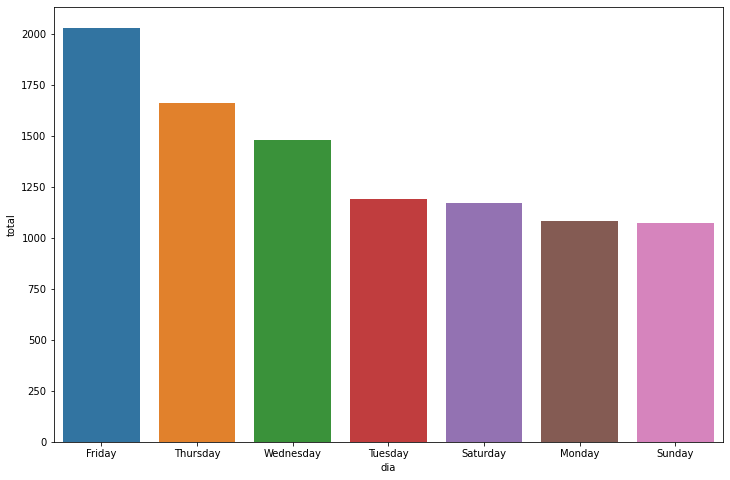

In [275]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = filtro_sub_jan_ny)

fevereiro

In [276]:
filtro_sub_fev_ny = subscriber_ny['mes'] == "fev"

In [277]:
filtro_sub_fev_ny = subscriber_ny[filtro_sub_fev_ny]

In [278]:
filtro_sub_fev_ny

,duracao,mes,hora,dia_semana,tipo_usuario
10180,17.233333,fev,0,Monday,Subscriber
10183,1.966667,fev,0,Monday,Subscriber
10184,9.050000,fev,0,Monday,Subscriber
10185,16.666667,fev,1,Monday,Subscriber
10186,6.933333,fev,1,Monday,Subscriber
...,...,...,...,...,...
21345,5.600000,fev,22,Monday,Subscriber
21346,8.233333,fev,22,Monday,Subscriber
21347,11.183333,fev,23,Monday,Subscriber
21348,7.350000,fev,23,Monday,Subscriber


In [279]:
filtro_sub_fev_ny.dia_semana.value_counts()

Monday       2039
Thursday     1804
Tuesday      1639
Friday       1416
Wednesday    1378
Saturday     1240
Sunday       1085
Name: dia_semana, dtype: int64

In [280]:
filtro_sub_fev_ny = filtro_sub_fev_ny.dia_semana.value_counts().to_frame().reset_index()

In [281]:
filtro_sub_fev_ny

,index,dia_semana
0,Monday,2039
1,Thursday,1804
2,Tuesday,1639
3,Friday,1416
4,Wednesday,1378
5,Saturday,1240
6,Sunday,1085


In [282]:
filtro_sub_fev_ny.columns = ['dia', 'total']
filtro_sub_fev_ny

,dia,total
0,Monday,2039
1,Thursday,1804
2,Tuesday,1639
3,Friday,1416
4,Wednesday,1378
5,Saturday,1240
6,Sunday,1085


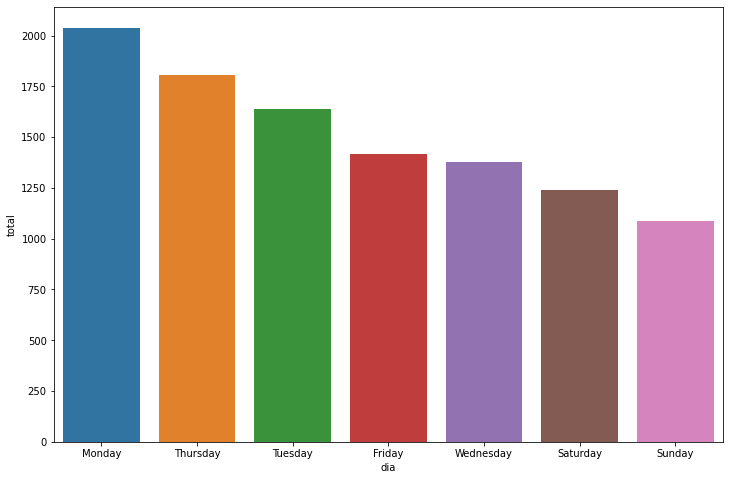

In [283]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = filtro_sub_fev_ny)

março


In [284]:
filtro_sub_mar_ny = subscriber_ny['mes'] == "mar"

In [285]:
filtro_sub_mar_ny = subscriber_ny[filtro_sub_mar_ny]

In [286]:
filtro_sub_mar_ny

,duracao,mes,hora,dia_semana,tipo_usuario
21350,24.150000,mar,13,Wednesday,Subscriber
21351,21.766667,mar,15,Wednesday,Subscriber
21352,7.700000,mar,18,Wednesday,Subscriber
21354,23.533333,mar,20,Thursday,Subscriber
21355,24.900000,mar,14,Saturday,Subscriber
...,...,...,...,...,...
39758,4.750000,mar,19,Thursday,Subscriber
39759,3.250000,mar,21,Thursday,Subscriber
39760,3.200000,mar,22,Thursday,Subscriber
39761,8.483333,mar,23,Thursday,Subscriber


In [287]:
filtro_sub_mar_ny.dia_semana.value_counts()

Wednesday    3340
Thursday     3263
Tuesday      3016
Friday       2289
Monday       1656
Saturday     1595
Sunday       1376
Name: dia_semana, dtype: int64

In [288]:
filtro_sub_mar_ny = filtro_sub_mar_ny.dia_semana.value_counts().to_frame().reset_index()

In [289]:
filtro_sub_mar_ny

,index,dia_semana
0,Wednesday,3340
1,Thursday,3263
2,Tuesday,3016
3,Friday,2289
4,Monday,1656
5,Saturday,1595
6,Sunday,1376


In [290]:
filtro_sub_mar_ny.columns = ['dia', 'total']
filtro_sub_mar_ny

,dia,total
0,Wednesday,3340
1,Thursday,3263
2,Tuesday,3016
3,Friday,2289
4,Monday,1656
5,Saturday,1595
6,Sunday,1376


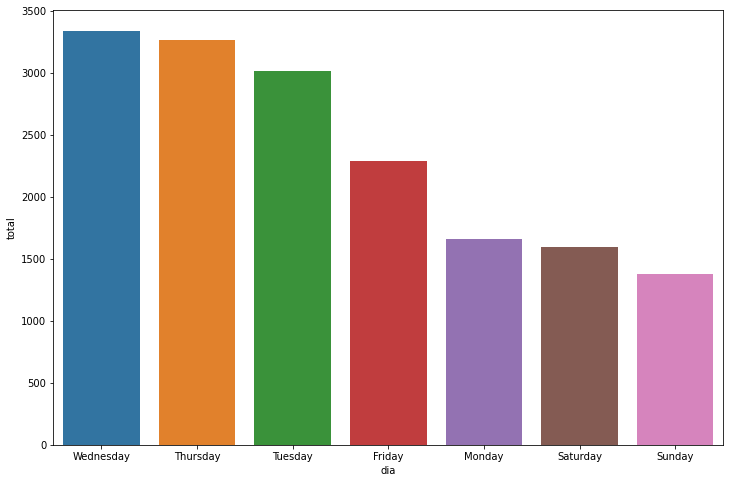

In [291]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = filtro_sub_mar_ny)

Explorando os dias das semanas do primeiro trimestre (meses) de usuários customer

### ***Compartilhamento de bicicletas em Washington - 2016 (Capitalbikeshare)***


In [292]:
import pandas as pd #Importa a biblioteca pandas para ler o arquivo
import seaborn as sns #Importa a biblioteca seaborn
import matplotlib.pyplot as plt #Importa a bilbioteca matplotlib
import csv 
from datetime import datetime #operações para analisar datas

In [293]:
df_was = pd.read_csv("Washington-2016-Summary.csv") #Atribui a uma variável 

In [294]:
df_was

,duration,month,hour,day_of_week,user_type
0,7.123117,3,22,Thursday,Subscriber
1,9.792517,3,22,Thursday,Subscriber
2,6.632983,3,22,Thursday,Subscriber
3,7.404700,3,22,Thursday,Subscriber
4,13.014583,3,22,Thursday,Subscriber
...,...,...,...,...,...
66321,15.421933,10,8,Saturday,Subscriber
66322,6.355217,10,5,Saturday,Subscriber
66323,17.632783,10,2,Saturday,Subscriber
66324,3.377233,10,0,Saturday,Subscriber


In [295]:
df_was.shape #Formato da tabela

(66326, 5)

In [296]:
df_was.columns = ["duracao" , "mes" , "hora" , "dia_semana", "tipo_usuario"] #renomear colunas [] lista (columns é um atributo do pandas)
df_was.head()

,duracao,mes,hora,dia_semana,tipo_usuario
0,7.123117,3,22,Thursday,Subscriber
1,9.792517,3,22,Thursday,Subscriber
2,6.632983,3,22,Thursday,Subscriber
3,7.404700,3,22,Thursday,Subscriber
4,13.014583,3,22,Thursday,Subscriber


In [297]:
df_was['mes'].unique() #Todos os valores que foram colocados na coluna mes

array([ 3,  2,  1,  4,  5,  6,  8,  7,  9, 12, 11, 10])

In [298]:
df_was['mes'].value_counts() #Quantas vezes em cada mes

7     7341
6     7320
8     7198
9     6878
10    6792
5     5768
4     5602
3     5571
11    5214
12    3354
2     2854
1     2434
Name: mes, dtype: int64

In [299]:
df_was['dia_semana'].value_counts() #Quantas vezes em cada dia

Wednesday    10103
Thursday      9984
Friday        9970
Tuesday       9748
Monday        9394
Saturday      8900
Sunday        8227
Name: dia_semana, dtype: int64

**Quantidade de viagens por dia no ano de 2016**

In [300]:
qtd_viagem_por_dia_was = df_was['dia_semana'].value_counts() #Quantas vezes em cada dia

In [301]:
qtd_viagem_por_dia_was #Washington

Wednesday    10103
Thursday      9984
Friday        9970
Tuesday       9748
Monday        9394
Saturday      8900
Sunday        8227
Name: dia_semana, dtype: int64

In [302]:
qtd_viagem_por_dia_was.to_frame()

,dia_semana
Wednesday,10103
Thursday,9984
Friday,9970
Tuesday,9748
Monday,9394
Saturday,8900
Sunday,8227


In [303]:
df_qtd_viagem_por_dia_was = qtd_viagem_por_dia_was.to_frame().reset_index()

In [304]:
df_qtd_viagem_por_dia_was #Quantidade total de viagens por dia em 2016

,index,dia_semana
0,Wednesday,10103
1,Thursday,9984
2,Friday,9970
3,Tuesday,9748
4,Monday,9394
5,Saturday,8900
6,Sunday,8227


In [305]:
df_qtd_viagem_por_dia_was.columns = ["dias", "total"]
df_qtd_viagem_por_dia_was

,dias,total
0,Wednesday,10103
1,Thursday,9984
2,Friday,9970
3,Tuesday,9748
4,Monday,9394
5,Saturday,8900
6,Sunday,8227


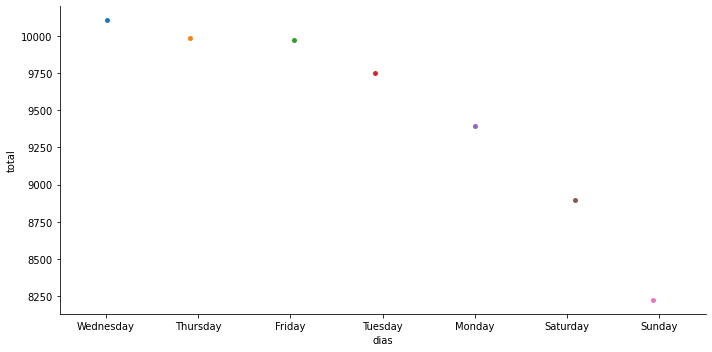

In [306]:
sns.catplot(x="dias", y="total", data = df_qtd_viagem_por_dia_was, aspect = 2)

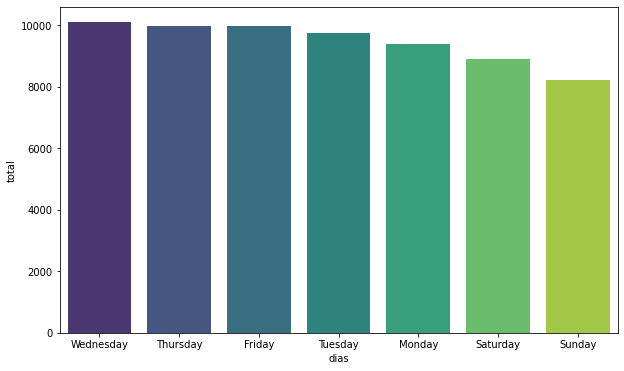

In [307]:
plt.figure(figsize=(10,6)) #Configura o tamanho da figura (10 para direita e 6 para baixo)
sns.barplot(x="dias", y="total", data = df_qtd_viagem_por_dia_was, palette = "viridis") #pallete, atributo que permite escolher um palete de cor, no caso é viridis

**Usuarios Inscritos e Usuarios "Visitantes"**

In [308]:
subscriber_was = df_was.loc[df_was.tipo_usuario=='Subscriber'].value_counts().sum()

In [309]:
subscriber_was

51753

In [310]:
customer_was = df_was.loc[df_was.tipo_usuario=='Customer'].value_counts().sum()

In [311]:
customer_was

14573

**Frequencia dos tipos de usuários em relação ao horário**

Quartis: Os quartis dividem os dados em quatro partes. Ordenando os dados cada quartil vai possuir 25% das observações. Ou seja, os primeiros 25% das observação estarão até o corte do 1º quartil, os próximos 25% até o corte do 2º quartil, etc.

Limites: O limite inferior é calculado sendo, geralmente, 1,5 vezes o corte do 1º quartil e o limite superior sendo 1,5 vezes o corte do 3º quartil.
O corte do segundo quartil é igual a mediana.

Outliers são observações atípicas, muito afastadas da maioria dos dados. Num boxplot esses valores ficam abaixo do limite inferior ou acima do limite superior.

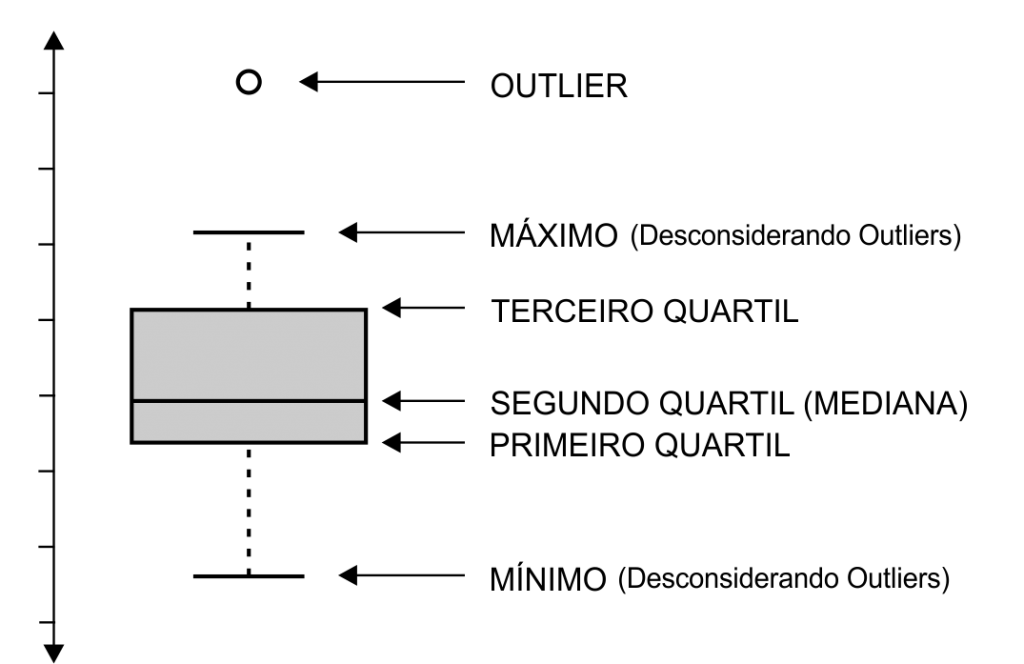

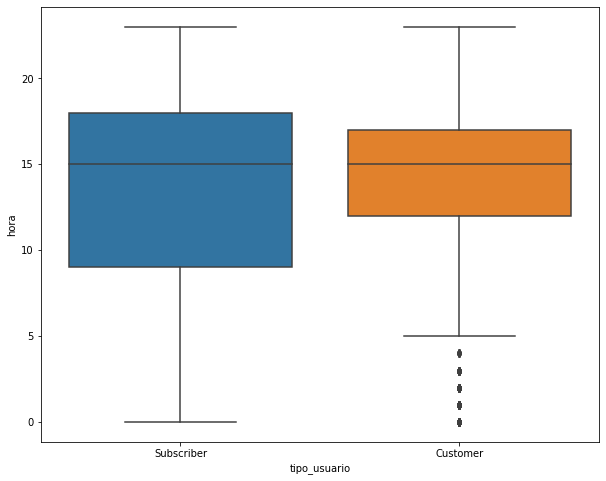

In [312]:
plt.figure(figsize=(10,8))
sns.boxplot(x="tipo_usuario", y="hora", data = df_was) 

In [313]:
df_was.groupby("tipo_usuario").median()["hora"] # Mediana

tipo_usuario
Customer      15.0
Subscriber    15.0
Name: hora, dtype: float64

**Explorando viagens por hora e por mes**

In [314]:
#Substitui valores da coluna por condição em pandas
df_was.loc[df_was.mes==1, "mes"]='jan'
df_was.loc[df_was.mes==2, "mes"]='fev'
df_was.loc[df_was.mes==3, "mes"]='mar'
df_was.loc[df_was.mes==4, "mes"]='abr'
df_was.loc[df_was.mes==5, "mes"]='mai'
df_was.loc[df_was.mes==6, "mes"]='jun'
df_was.loc[df_was.mes==7, "mes"]='jul'
df_was.loc[df_was.mes==8, "mes"]='ago'
df_was.loc[df_was.mes==9, "mes"]='set'
df_was.loc[df_was.mes==10, "mes"]='out'
df_was.loc[df_was.mes==11, "mes"]='nov'
df_was.loc[df_was.mes==12, "mes"]='dez'

In [315]:
df_was["mes"].value_counts() #Quantidade de viagens por mes em Chicago

jul    7341
jun    7320
ago    7198
set    6878
out    6792
mai    5768
abr    5602
mar    5571
nov    5214
dez    3354
fev    2854
jan    2434
Name: mes, dtype: int64

In [316]:
qtd_viagem_mes_was = df_was['mes'].value_counts()

In [317]:
qtd_viagem_mes_was = qtd_viagem_mes_was.to_frame().reset_index()

In [318]:
qtd_viagem_mes_was.columns = ["mes", "total"]
qtd_viagem_mes_was

,mes,total
0,jul,7341
1,jun,7320
2,ago,7198
3,set,6878
4,out,6792
5,mai,5768
6,abr,5602
7,mar,5571
8,nov,5214
9,dez,3354


**Análise geral por mes (todos os usuários, customer e subscriber)**

**Opção 1**

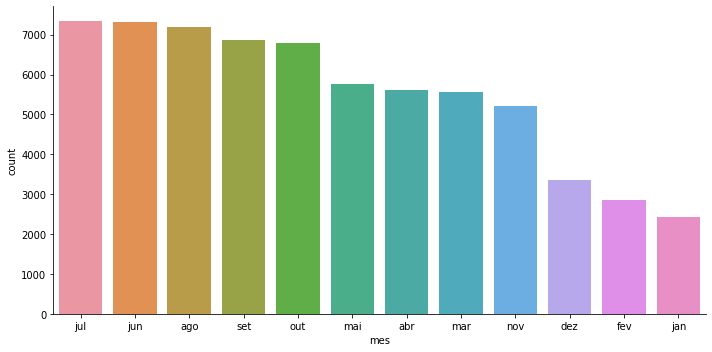

In [319]:
sns.catplot(x="mes", kind="count", data = df_was, aspect = 2, order = df_was['mes'].value_counts().index)
# usando alto nível, o sns.catplot vai plotar categoricamente as categorias de "mes", de maneira que conte (kind="count") quantas vezes aparece, e o data = df_chicago (está usando o DF df_chicago que importamos)
# aspect configura o tamanho da figura, colocando o 2 para trazer o dobro (retangulo) do quadrado.
# E o order define a ordem como é apresentado o gráfico, no caso é a ordem da série df_chicago['mes'].value_counts().index e o ".index" é o indice que está definida a ordem. index da série.

**Opção 2**

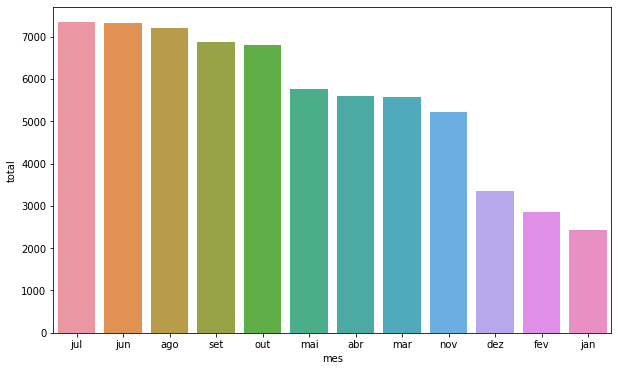

In [320]:
plt.figure(figsize=(10,6)) #Configura o tamanho da figura (10 para direita e 6 para baixo)
sns.barplot(x="mes", y="total", data = qtd_viagem_mes_was)

**Explorando por horário (todos os usuários)**

In [321]:
df_was['hora'].value_counts() #Quantidade de viagens no ano de 2016 por horário

17    7600
18    6111
8     5615
16    5104
19    4188
15    3829
7     3779
12    3667
13    3638
14    3620
9     3375
11    2984
20    2911
10    2608
21    2072
22    1459
6     1347
23     858
0      515
5      407
1      299
2      184
3       89
4       67
Name: hora, dtype: int64

In [322]:
qtd_viagem_hora_was = df_was['hora'].value_counts()

In [323]:
qtd_viagem_hora_was

17    7600
18    6111
8     5615
16    5104
19    4188
15    3829
7     3779
12    3667
13    3638
14    3620
9     3375
11    2984
20    2911
10    2608
21    2072
22    1459
6     1347
23     858
0      515
5      407
1      299
2      184
3       89
4       67
Name: hora, dtype: int64

In [324]:
qtd_viagem_hora_was = qtd_viagem_hora_was.to_frame().reset_index()

In [325]:
qtd_viagem_hora_was

,index,hora
0,17,7600
1,18,6111
2,8,5615
3,16,5104
4,19,4188
5,15,3829
6,7,3779
7,12,3667
8,13,3638
9,14,3620


In [326]:
qtd_viagem_hora_was.columns = ['hora', 'total']
qtd_viagem_hora_was

,hora,total
0,17,7600
1,18,6111
2,8,5615
3,16,5104
4,19,4188
5,15,3829
6,7,3779
7,12,3667
8,13,3638
9,14,3620


**Analise por hora de todos os usuários**

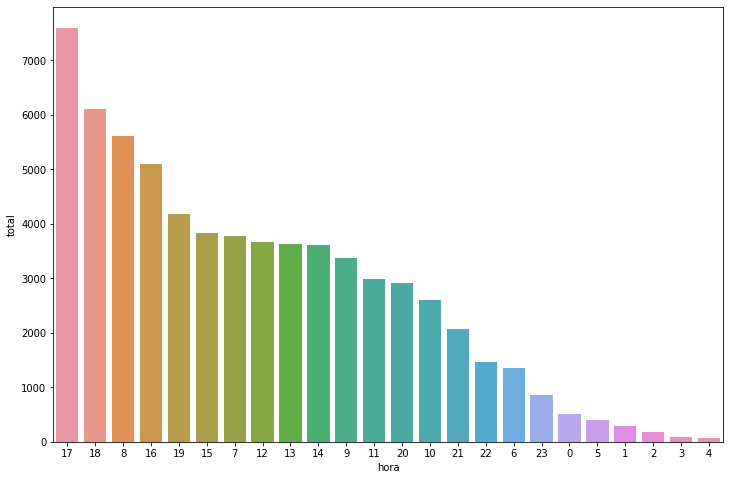

In [327]:
plt.figure(figsize=(12,8)) #Configura o tamanho da figura (12 para direita e 8 para baixo)
sns.barplot(x="hora", y="total", data = qtd_viagem_hora_was, order = df_was['hora'].value_counts().index)
# Quantidade total de viagens de todos os usuários por horário

**Quantidade ou frequencia de usuários por categoria (Subscriber e Customer)**

In [328]:
subscriber_was = df_was.loc[df_was.tipo_usuario=='Subscriber'].value_counts().sum()

In [329]:
subscriber_was

51753

In [330]:
customer_was = df_was.loc[df_was.tipo_usuario=='Customer'].value_counts().sum()

In [331]:
customer_was

14573

In [332]:
df_usuarios_was = {
    'tipo' : ['subscriber', 'customer'],
    'total' : [subscriber_was, customer_was]
    # {} dicionário do python
}

df_usuarios_was

{'tipo': ['subscriber', 'customer'], 'total': [51753, 14573]}

In [333]:
pd.DataFrame(df_usuarios_was) #Cria ou transforma em dataframe em cima de 'df_usuarios_chicago' que acabei de criar como dicionario

,tipo,total
0,subscriber,51753
1,customer,14573


In [334]:
 df_usuarios_was = pd.DataFrame(df_usuarios_was)
 df_usuarios_was

,tipo,total
0,subscriber,51753
1,customer,14573


**Analise de frequencia ou quantidades de usuarios**

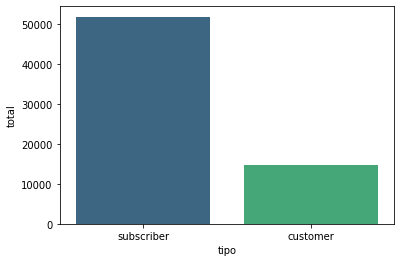

In [335]:
sns.barplot(x="tipo", y="total", data = df_usuarios_was, palette = "viridis") #Gráfico de barras com seaborn, definindo o "tipo" no eixo x e o "total" no eixo y, extraido do DF df_usuarios_chicago

**Mediana de viagem por tipo de usuário**

In [336]:
df_was.groupby("tipo_usuario").median()["duracao"] # Mediana

tipo_usuario
Customer      24.896717
Subscriber     9.733217
Name: duracao, dtype: float64

In [337]:
df_mediana_viagem_users_was = df_was.groupby("tipo_usuario").median()["duracao"].to_frame().reset_index()

In [338]:
df_mediana_viagem_users_was

,tipo_usuario,duracao
0,Customer,24.896717
1,Subscriber,9.733217


In [339]:
df_mediana_viagem_users_was.columns = ['users', 'duracao']

In [340]:
df_mediana_viagem_users_was.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2.5px solid black')]}])

,users,duracao
0,Customer,24.896717
1,Subscriber,9.733217


**Média de viagem por tipo de usuário**

In [341]:
df_was.groupby("tipo_usuario").mean()["duracao"] # Duração média por tipo de usuário

tipo_usuario
Customer      41.678031
Subscriber    12.528120
Name: duracao, dtype: float64

In [342]:
df_media_viagem_users_was = df_was.groupby("tipo_usuario").mean()["duracao"].to_frame().reset_index()
df_media_viagem_users_was

,tipo_usuario,duracao
0,Customer,41.678031
1,Subscriber,12.528120


In [343]:
df_media_viagem_users_was.columns = ['users', 'duracao']

In [344]:
df_media_viagem_users_was.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2.5px solid black')]}])

,users,duracao
0,Customer,41.678031
1,Subscriber,12.528120


**Explorando a frequencia (mes e hora) de usuários customizados e usuários cadastrados**

In [345]:
total_tipo_usuarios_was = df_was.tipo_usuario.value_counts()

In [346]:
total_tipo_usuarios_was

Subscriber    51753
Customer      14573
Name: tipo_usuario, dtype: int64

In [347]:
df_was2 = df_was.copy()

In [348]:
df_was2

,duracao,mes,hora,dia_semana,tipo_usuario
0,7.123117,mar,22,Thursday,Subscriber
1,9.792517,mar,22,Thursday,Subscriber
2,6.632983,mar,22,Thursday,Subscriber
3,7.404700,mar,22,Thursday,Subscriber
4,13.014583,mar,22,Thursday,Subscriber
...,...,...,...,...,...
66321,15.421933,out,8,Saturday,Subscriber
66322,6.355217,out,5,Saturday,Subscriber
66323,17.632783,out,2,Saturday,Subscriber
66324,3.377233,out,0,Saturday,Subscriber


**Criando um DF para usuários Subscriber e outro para Customer**

**Explorando de usuários Subscriber por mes**

In [349]:
filtro_sub_was = df_was2['tipo_usuario'] == "Subscriber" #Filtra só usuários Subscriber na coluna 'tipo_usuario' e armazena no filtro_sub_chicago

In [350]:
subscriber_was = df_was2[filtro_sub_was] #Utiliza o filtro armazenado em 'filtro_sub_chicago' no df_chicago2 (cópia do df_chicago) e armazena na variável subscriber_chicago

In [351]:
subscriber_was #Data frame só com os usuários cadastrados

,duracao,mes,hora,dia_semana,tipo_usuario
0,7.123117,mar,22,Thursday,Subscriber
1,9.792517,mar,22,Thursday,Subscriber
2,6.632983,mar,22,Thursday,Subscriber
3,7.404700,mar,22,Thursday,Subscriber
4,13.014583,mar,22,Thursday,Subscriber
...,...,...,...,...,...
66321,15.421933,out,8,Saturday,Subscriber
66322,6.355217,out,5,Saturday,Subscriber
66323,17.632783,out,2,Saturday,Subscriber
66324,3.377233,out,0,Saturday,Subscriber


In [352]:
subscriber_was.mes.value_counts()

jun    5613
ago    5392
out    5232
set    5204
jul    5155
mai    4520
abr    4410
mar    4383
nov    4139
dez    2922
fev    2571
jan    2212
Name: mes, dtype: int64

In [353]:
freq_sub_mes_was = subscriber_was.mes.value_counts()

In [354]:
freq_sub_mes_was.to_frame()

,mes
jun,5613
ago,5392
out,5232
set,5204
jul,5155
mai,4520
abr,4410
mar,4383
nov,4139
dez,2922


In [355]:
freq_sub_mes_was.to_frame().reset_index() #reseta o index, adicionando mais uma coluna

,index,mes
0,jun,5613
1,ago,5392
2,out,5232
3,set,5204
4,jul,5155
5,mai,4520
6,abr,4410
7,mar,4383
8,nov,4139
9,dez,2922


In [356]:
freq_sub_mes_was = freq_sub_mes_was.to_frame().reset_index()

In [357]:
freq_sub_mes_was.columns = ['mês', 'total']
freq_sub_mes_was

,mês,total
0,jun,5613
1,ago,5392
2,out,5232
3,set,5204
4,jul,5155
5,mai,4520
6,abr,4410
7,mar,4383
8,nov,4139
9,dez,2922


In [358]:
# Acrescentando mais uma coluna de acordo com os meses, ex jun é mes 6, janeiro é mes 1, levando-se em conta a ordem da celula anterior
ordem_mes_washington = [6, 8, 10, 9, 7, 5, 4, 3, 11, 12, 2, 1] # Adicionando o valores na coluna que será atribuida ao DF
freq_sub_mes_was['ordem_mes_washington'] = ordem_mes_washington # Atribuindo 'ordem_mes_washington' ao DF freq_sub_mes_was
print(freq_sub_mes_was) # Imprime na tela

    mês  total  ordem_mes_washington
0   jun   5613                     6
1   ago   5392                     8
2   out   5232                    10
3   set   5204                     9
4   jul   5155                     7
5   mai   4520                     5
6   abr   4410                     4
7   mar   4383                     3
8   nov   4139                    11
9   dez   2922                    12
10  fev   2571                     2
11  jan   2212                     1


In [359]:
freq_sub_mes_was

,mês,total,ordem_mes_washington
0,jun,5613,6
1,ago,5392,8
2,out,5232,10
3,set,5204,9
4,jul,5155,7
5,mai,4520,5
6,abr,4410,4
7,mar,4383,3
8,nov,4139,11
9,dez,2922,12


In [360]:
freq_sub_mes_was.sort_values(by=['ordem_mes_washington']) # Com o parametro sort_values, ordena os valores de acordo com a coluna 'ordem_mes_washington'

,mês,total,ordem_mes_washington
11,jan,2212,1
10,fev,2571,2
7,mar,4383,3
6,abr,4410,4
5,mai,4520,5
0,jun,5613,6
4,jul,5155,7
1,ago,5392,8
3,set,5204,9
2,out,5232,10


**Frequencia de usuários Subscriber (cadastrado) por mes**

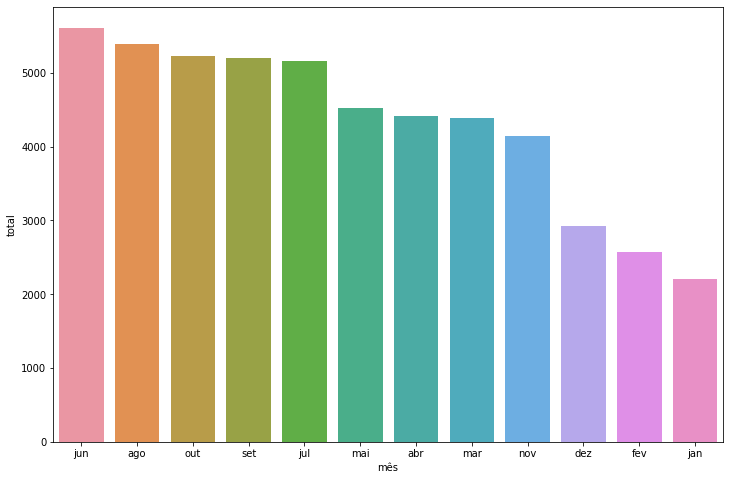

In [361]:
plt.figure(figsize=(12,8))
sns.barplot(x="mês", y="total", data = freq_sub_mes_was)

Text(0.5, 0, 'mes')

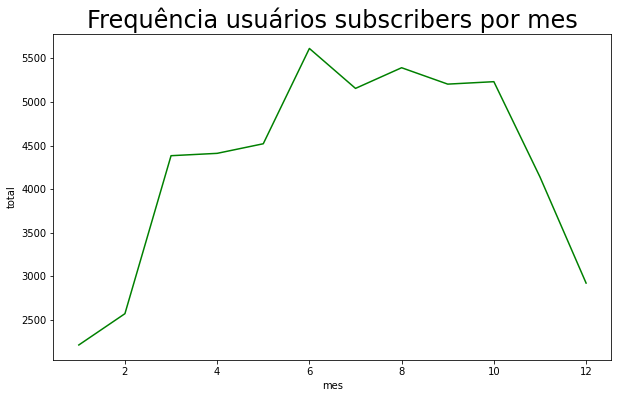

In [362]:
#GRAFICO DE LINHA
plt.figure(figsize=(10,6))
sns.lineplot(data = freq_sub_mes_was, x="ordem_mes_washington", y="total", color = "green")
plt.title( "Frequência usuários subscribers por mes" , size = 24 ) #Define o título do gráfico e define o tamanho
plt.xlabel( "mes" , size = 10 ) #Usa o plt para adicionar um rotulo no eixo x e define o tamanho

**Explorando de usuários Customer por mes**

In [363]:
filtro_cust_was = df_was2['tipo_usuario'] == "Customer" 

In [364]:
customer_was = df_was2[filtro_cust_was]
customer_was

,duracao,mes,hora,dia_semana,tipo_usuario
10,16.912317,mar,21,Thursday,Customer
12,102.999183,mar,21,Thursday,Customer
16,9.667250,mar,20,Thursday,Customer
25,12.898400,mar,19,Thursday,Customer
29,25.301633,mar,19,Thursday,Customer
...,...,...,...,...,...
66276,9.205000,out,13,Saturday,Customer
66305,216.092433,out,11,Saturday,Customer
66315,14.797083,out,9,Saturday,Customer
66319,20.423033,out,8,Saturday,Customer


In [365]:
customer_was.mes.value_counts()

jul    2186
ago    1806
jun    1707
set    1674
out    1560
mai    1248
abr    1192
mar    1188
nov    1075
dez     432
fev     283
jan     222
Name: mes, dtype: int64

In [366]:
freq_cust_mes_was = customer_was.mes.value_counts()

In [367]:
freq_cust_mes_was.to_frame() #Transforma uma serie em DataFrame

,mes
jul,2186
ago,1806
jun,1707
set,1674
out,1560
mai,1248
abr,1192
mar,1188
nov,1075
dez,432


In [368]:
freq_cust_mes_was.to_frame().reset_index() #reseta o index, adicionando mais uma coluna

,index,mes
0,jul,2186
1,ago,1806
2,jun,1707
3,set,1674
4,out,1560
5,mai,1248
6,abr,1192
7,mar,1188
8,nov,1075
9,dez,432


In [369]:
freq_cust_mes_was = freq_cust_mes_was.to_frame().reset_index()

In [370]:
freq_cust_mes_was.columns = ['mês', 'total']
freq_cust_mes_was

,mês,total
0,jul,2186
1,ago,1806
2,jun,1707
3,set,1674
4,out,1560
5,mai,1248
6,abr,1192
7,mar,1188
8,nov,1075
9,dez,432


In [371]:
ordem_mes_washington = [7, 8, 6, 9, 10, 5, 4, 3, 11, 12, 2, 1]
freq_cust_mes_was['ordem_mes_washington'] = ordem_mes_washington
print(freq_cust_mes_was)

    mês  total  ordem_mes_washington
0   jul   2186                     7
1   ago   1806                     8
2   jun   1707                     6
3   set   1674                     9
4   out   1560                    10
5   mai   1248                     5
6   abr   1192                     4
7   mar   1188                     3
8   nov   1075                    11
9   dez    432                    12
10  fev    283                     2
11  jan    222                     1


In [372]:
freq_cust_mes_was

,mês,total,ordem_mes_washington
0,jul,2186,7
1,ago,1806,8
2,jun,1707,6
3,set,1674,9
4,out,1560,10
5,mai,1248,5
6,abr,1192,4
7,mar,1188,3
8,nov,1075,11
9,dez,432,12


In [373]:
freq_cust_mes_was.sort_values(by=['ordem_mes_washington'])

,mês,total,ordem_mes_washington
11,jan,222,1
10,fev,283,2
7,mar,1188,3
6,abr,1192,4
5,mai,1248,5
2,jun,1707,6
0,jul,2186,7
1,ago,1806,8
3,set,1674,9
4,out,1560,10


**Frequencia de usuários "Customer" por mes**

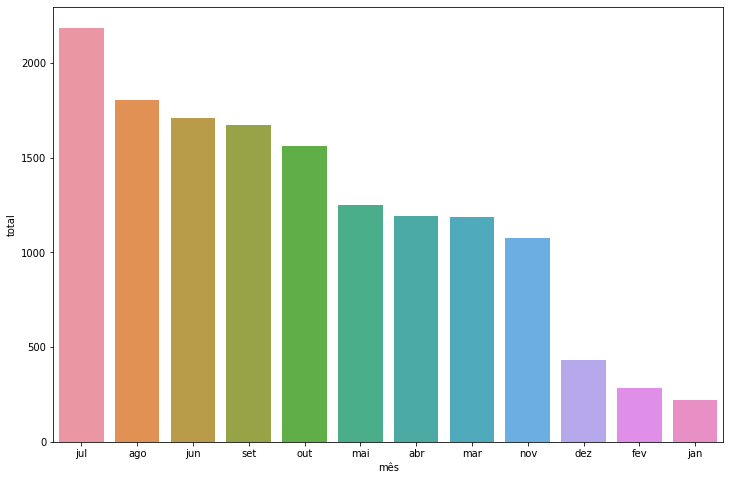

In [374]:
plt.figure(figsize=(12,8)) #Configura o tamanho da figura (12 para direita e 8 para baixo)
sns.barplot(x="mês", y="total", data = freq_cust_mes_was)

Text(0.5, 0, 'mes')

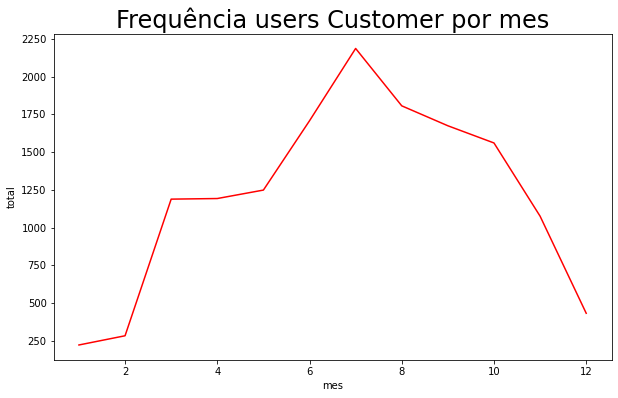

In [375]:
#GRAFICO DE LINHA
plt.figure(figsize=(10,6))
sns.lineplot(data = freq_cust_mes_was, x="ordem_mes_washington", y="total", color = "red")
plt.title( "Frequência users Customer por mes" , size = 24 ) #Define o título do gráfico e define o tamanho
plt.xlabel( "mes" , size = 10 ) #Usa o plt para adicionar um rotulo no eixo x e define o tamanho

**Explorando de usuários Subscriber (cadastrado) por hora**

In [376]:
subscriber_was.hora.value_counts()

17    6225
8     5256
18    5131
16    3730
7     3584
19    3380
9     2828
15    2547
12    2477
13    2395
20    2295
14    2219
11    1989
10    1713
21    1640
6     1276
22    1138
23     665
5      391
0      385
1      224
2      146
3       64
4       55
Name: hora, dtype: int64

In [377]:
freq_sub_hora_was = subscriber_was.hora.value_counts()

In [378]:
freq_sub_hora_was.to_frame() #Transforma uma serie em DataFrame
freq_sub_hora_was = freq_sub_hora_was.to_frame().reset_index()
freq_sub_hora_was.columns = ['hora', 'total']
freq_sub_hora_was

,hora,total
0,17,6225
1,8,5256
2,18,5131
3,16,3730
4,7,3584
5,19,3380
6,9,2828
7,15,2547
8,12,2477
9,13,2395


**Frequencia de usuários "Subscriber" por hora**

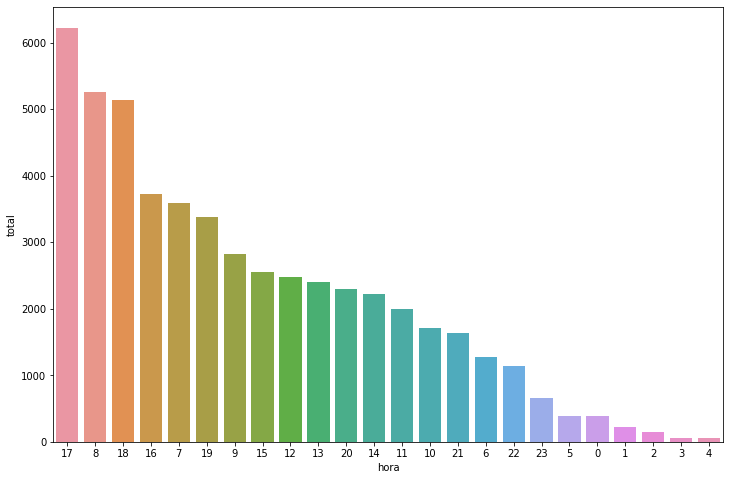

In [379]:
plt.figure(figsize=(12,8))
sns.barplot(x="hora", y="total", data = freq_sub_hora_was, order = subscriber_was['hora'].value_counts().index )

**Explorando de usuários Customer (visitantes) por hora**

In [380]:
customer_was.hora.value_counts()

14    1401
17    1375
16    1374
15    1282
13    1243
12    1190
11     995
18     980
10     895
19     808
20     616
9      547
21     432
8      359
22     321
7      195
23     193
0      130
1       75
6       71
2       38
3       25
5       16
4       12
Name: hora, dtype: int64

In [381]:
freq_cust_hora_was = customer_was.hora.value_counts()

In [382]:
freq_cust_hora_was.to_frame() #Transforma uma serie em DataFrame

freq_cust_hora_was = freq_cust_hora_was.to_frame().reset_index()

freq_cust_hora_was.columns = ['hora', 'total']
freq_cust_hora_was

,hora,total
0,14,1401
1,17,1375
2,16,1374
3,15,1282
4,13,1243
5,12,1190
6,11,995
7,18,980
8,10,895
9,19,808


**Frequencia de usuários "Customer" por hora**

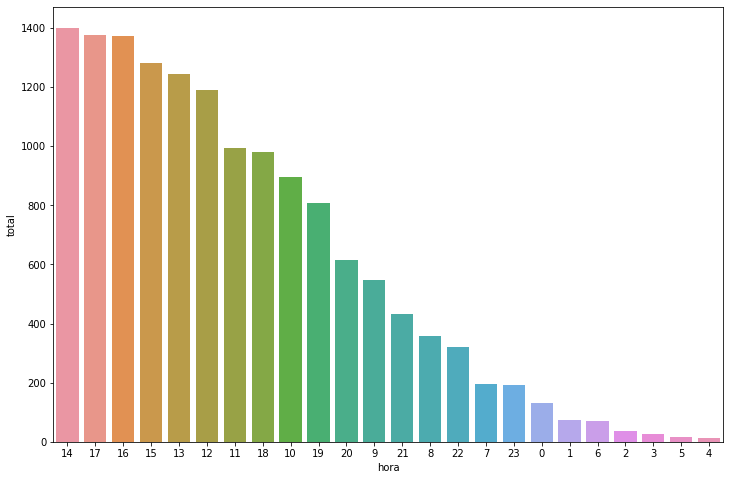

In [383]:
plt.figure(figsize=(12,8))
sns.barplot(x="hora", y="total", data = freq_cust_hora_was, order = customer_was['hora'].value_counts().index )

**Explorando de usuários (Subscriber) por dia da semana**

In [384]:
subscriber_was['dia_semana'].value_counts() #Utilizando o df subscriber_chicago que foi criado anteriormente

Wednesday    8520
Thursday     8454
Tuesday      8322
Friday       7958
Monday       7658
Saturday     5589
Sunday       5252
Name: dia_semana, dtype: int64

In [385]:
freq_sub_dia_was = subscriber_was['dia_semana'].value_counts()

In [386]:
freq_sub_dia_was

Wednesday    8520
Thursday     8454
Tuesday      8322
Friday       7958
Monday       7658
Saturday     5589
Sunday       5252
Name: dia_semana, dtype: int64

In [387]:
freq_sub_dia_was.to_frame().reset_index()

,index,dia_semana
0,Wednesday,8520
1,Thursday,8454
2,Tuesday,8322
3,Friday,7958
4,Monday,7658
5,Saturday,5589
6,Sunday,5252


In [388]:
freq_sub_dia_was = freq_sub_dia_was.to_frame().reset_index()

In [389]:
freq_sub_dia_was.columns = ["dia", "total"]

In [390]:
freq_sub_dia_was

,dia,total
0,Wednesday,8520
1,Thursday,8454
2,Tuesday,8322
3,Friday,7958
4,Monday,7658
5,Saturday,5589
6,Sunday,5252


**Frequencia de usuários (Subscriber) por dia da semana no ano**

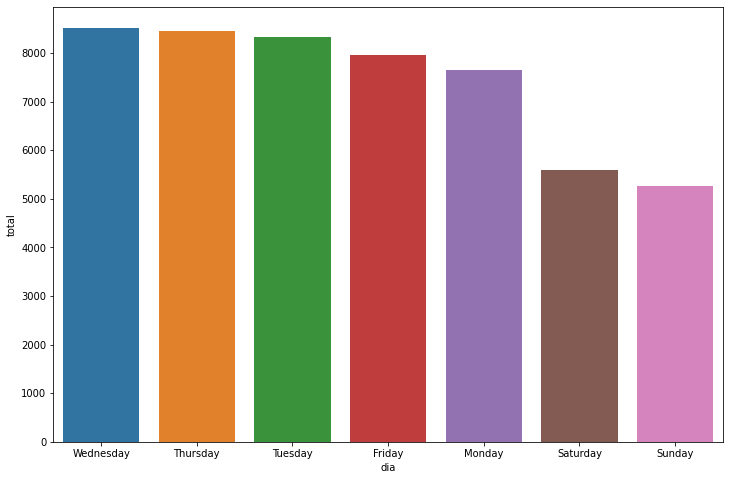

In [391]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = freq_sub_dia_was)

**Explorando usuários (Customer) por dia da semana**

In [392]:
customer_was['dia_semana'].value_counts() #Utilizando o df customer_chicago que foi criado anteriormente

Saturday     3311
Sunday       2975
Friday       2012
Monday       1736
Wednesday    1583
Thursday     1530
Tuesday      1426
Name: dia_semana, dtype: int64

In [393]:
freq_cust_dia_was = customer_was['dia_semana'].value_counts()

In [394]:
freq_cust_dia_was

Saturday     3311
Sunday       2975
Friday       2012
Monday       1736
Wednesday    1583
Thursday     1530
Tuesday      1426
Name: dia_semana, dtype: int64

In [395]:
freq_cust_dia_was.to_frame().reset_index()

,index,dia_semana
0,Saturday,3311
1,Sunday,2975
2,Friday,2012
3,Monday,1736
4,Wednesday,1583
5,Thursday,1530
6,Tuesday,1426


In [396]:
freq_cust_dia_was = freq_cust_dia_was.to_frame().reset_index()

In [397]:
freq_cust_dia_was

,index,dia_semana
0,Saturday,3311
1,Sunday,2975
2,Friday,2012
3,Monday,1736
4,Wednesday,1583
5,Thursday,1530
6,Tuesday,1426


In [398]:
freq_cust_dia_was.columns = ['dia', 'total']

In [399]:
freq_cust_dia_was

,dia,total
0,Saturday,3311
1,Sunday,2975
2,Friday,2012
3,Monday,1736
4,Wednesday,1583
5,Thursday,1530
6,Tuesday,1426


**Frequencia de usuários (Customer) por dia da semana no ano**

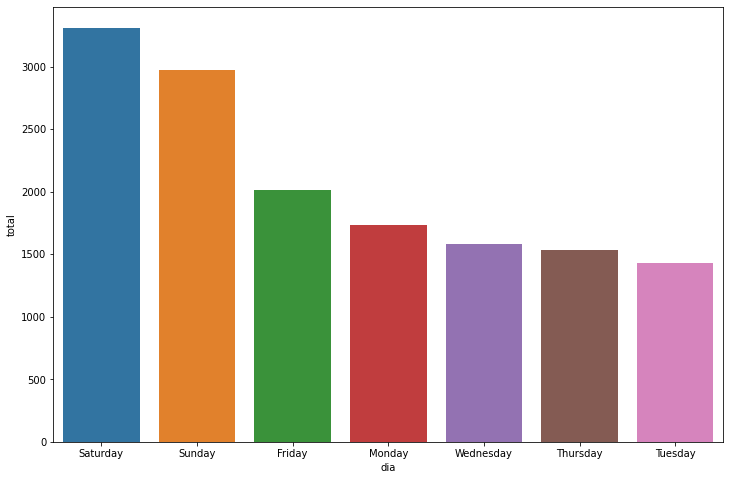

In [400]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = freq_cust_dia_was)

**Explorando os dias das semanas do primeiro trimestre (meses) de usuários Subscriber**

In [401]:
filtro_sub_jan_was = subscriber_was['mes'] == "jan"

In [402]:
filtro_sub_jan_was = subscriber_was[filtro_sub_jan_was]

In [403]:
filtro_sub_jan_was

,duracao,mes,hora,dia_semana,tipo_usuario
8425,5.674333,jan,23,Sunday,Subscriber
8426,15.558917,jan,23,Sunday,Subscriber
8427,8.356967,jan,20,Sunday,Subscriber
8428,11.574267,jan,20,Sunday,Subscriber
8429,7.082417,jan,20,Sunday,Subscriber
...,...,...,...,...,...
10854,7.493617,jan,1,Friday,Subscriber
10855,6.542750,jan,1,Friday,Subscriber
10856,4.563583,jan,1,Friday,Subscriber
10857,11.080450,jan,0,Friday,Subscriber


In [404]:
filtro_sub_jan_was.dia_semana.value_counts()

Thursday     408
Friday       375
Wednesday    312
Saturday     307
Tuesday      286
Sunday       264
Monday       260
Name: dia_semana, dtype: int64

In [405]:
filtro_sub_jan_was = filtro_sub_jan_was.dia_semana.value_counts().to_frame().reset_index()

In [406]:
filtro_sub_jan_was

,index,dia_semana
0,Thursday,408
1,Friday,375
2,Wednesday,312
3,Saturday,307
4,Tuesday,286
5,Sunday,264
6,Monday,260


In [407]:
filtro_sub_jan_was.columns = ['dia', 'total']

In [408]:
filtro_sub_jan_was

,dia,total
0,Thursday,408
1,Friday,375
2,Wednesday,312
3,Saturday,307
4,Tuesday,286
5,Sunday,264
6,Monday,260


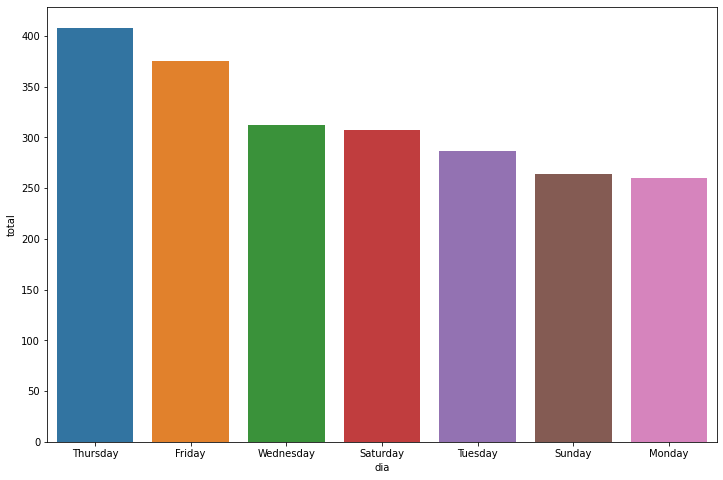

In [409]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = filtro_sub_jan_was)

**Fevereiro**

In [410]:
filtro_sub_fev_was = subscriber_was['mes'] == "fev"

In [411]:
filtro_sub_fev_was = subscriber_was[filtro_sub_fev_was]

In [412]:
filtro_sub_fev_was

,duracao,mes,hora,dia_semana,tipo_usuario
5571,7.514917,fev,23,Monday,Subscriber
5572,19.111333,fev,23,Monday,Subscriber
5573,1.299983,fev,22,Monday,Subscriber
5574,4.808983,fev,22,Monday,Subscriber
5575,17.798450,fev,22,Monday,Subscriber
...,...,...,...,...,...
8420,5.122833,fev,6,Monday,Subscriber
8421,12.389317,fev,6,Monday,Subscriber
8422,11.508233,fev,6,Monday,Subscriber
8423,7.440017,fev,5,Monday,Subscriber


In [413]:
filtro_sub_fev_was.dia_semana.value_counts()

Monday       470
Thursday     448
Friday       408
Wednesday    331
Saturday     310
Tuesday      309
Sunday       295
Name: dia_semana, dtype: int64

In [414]:
filtro_sub_fev_was = filtro_sub_fev_was.dia_semana.value_counts().to_frame().reset_index()

In [415]:
filtro_sub_fev_was

,index,dia_semana
0,Monday,470
1,Thursday,448
2,Friday,408
3,Wednesday,331
4,Saturday,310
5,Tuesday,309
6,Sunday,295


In [416]:
filtro_sub_fev_was.columns = ['dia','total']

In [417]:
filtro_sub_fev_was

,dia,total
0,Monday,470
1,Thursday,448
2,Friday,408
3,Wednesday,331
4,Saturday,310
5,Tuesday,309
6,Sunday,295


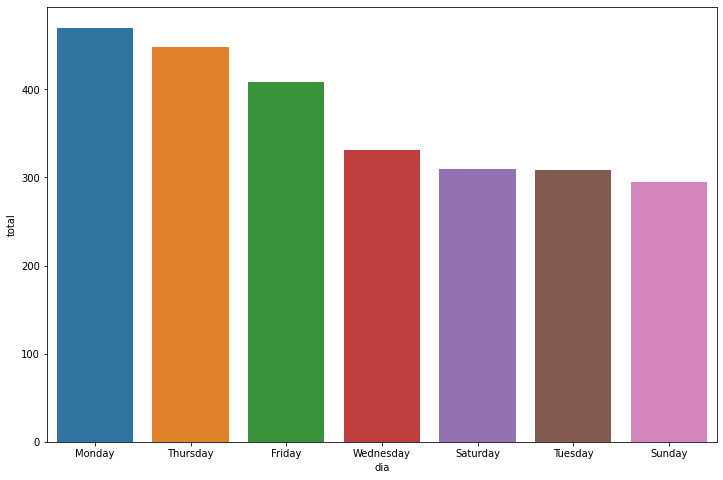

In [418]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = filtro_sub_fev_was)

**Março**

In [419]:
filtro_sub_mar_was = subscriber_was['mes'] == "mar"

In [420]:
filtro_sub_mar_was = subscriber_was[filtro_sub_mar_was]

In [421]:
filtro_sub_mar_was

,duracao,mes,hora,dia_semana,tipo_usuario
0,7.123117,mar,22,Thursday,Subscriber
1,9.792517,mar,22,Thursday,Subscriber
2,6.632983,mar,22,Thursday,Subscriber
3,7.404700,mar,22,Thursday,Subscriber
4,13.014583,mar,22,Thursday,Subscriber
...,...,...,...,...,...
5566,20.393917,mar,6,Tuesday,Subscriber
5567,6.902017,mar,6,Tuesday,Subscriber
5568,6.644233,mar,6,Tuesday,Subscriber
5569,3.598450,mar,6,Tuesday,Subscriber


In [422]:
filtro_sub_mar_was.dia_semana.value_counts()

Wednesday    841
Thursday     837
Tuesday      797
Friday       583
Monday       579
Saturday     428
Sunday       318
Name: dia_semana, dtype: int64

In [423]:
filtro_sub_mar_was = filtro_sub_mar_was.dia_semana.value_counts().to_frame().reset_index()

In [424]:
filtro_sub_mar_was

,index,dia_semana
0,Wednesday,841
1,Thursday,837
2,Tuesday,797
3,Friday,583
4,Monday,579
5,Saturday,428
6,Sunday,318


In [425]:
filtro_sub_mar_was.columns = ['dia', 'total']
filtro_sub_mar_was

,dia,total
0,Wednesday,841
1,Thursday,837
2,Tuesday,797
3,Friday,583
4,Monday,579
5,Saturday,428
6,Sunday,318


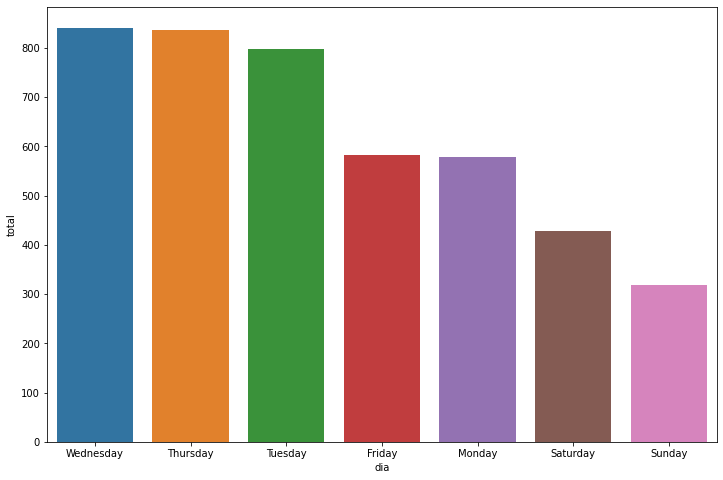

In [426]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = filtro_sub_mar_was)

**Explorando os dias das semanas do primeiro trimestre (meses) de usuários Customer**

**Janeiro**

Fevereiro

Março

# **Plotagem das cidades (Chicago, NY e Washington)**

## Grafico 1 (Agrupamento) - Frequencia de usuários Subscribers e Customers por cidade

In [427]:
sub_chicago = df_chicago.loc[df_chicago.tipo_usuario=='Subscriber'].value_counts().sum()

In [428]:
sub_chicago

54982

In [429]:
sub_ny = df_ny.loc[df_ny.tipo_usuario=='Subscriber'].value_counts().sum()

In [430]:
sub_ny

245896

In [431]:
sub_was = df_was.loc[df_was.tipo_usuario=='Subscriber'].value_counts().sum()

In [432]:
sub_was

51753

In [433]:
cust_chicago = df_chicago.loc[df_chicago.tipo_usuario=='Customer'].value_counts().sum()

In [434]:
cust_chicago

17149

In [435]:
cust_ny = df_ny.loc[df_ny.tipo_usuario=='Customer'].value_counts().sum()

In [436]:
cust_ny

30185

In [437]:
cust_was = df_was.loc[df_was.tipo_usuario=='Customer'].value_counts().sum()

In [438]:
cust_was

14573

In [439]:
df_sub_and_cust = pd.DataFrame([['Chicago', sub_chicago, cust_chicago], ['NY', sub_ny, cust_ny], ['Was', sub_was, cust_was]], columns=['City', 'Subscribers', 'Customers'])
print(df_sub_and_cust)

      City  Subscribers  Customers
0  Chicago        54982      17149
1       NY       245896      30185
2      Was        51753      14573


Text(0.5, 1.0, 'Frequencia de usuários por cidade')

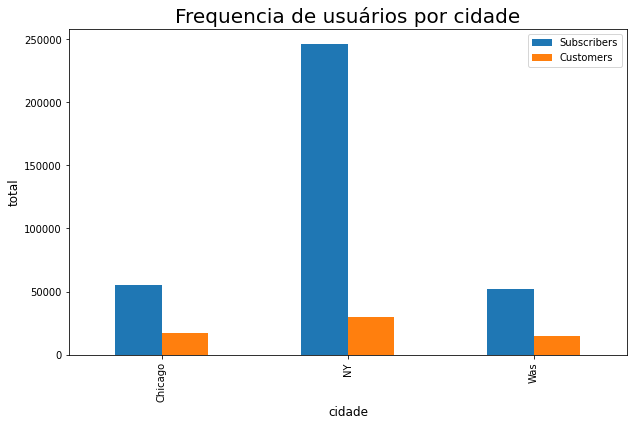

In [440]:
df_sub_and_cust.plot(x='City', kind='bar', stacked=False, title='Frequencia de usuarios por cidade', figsize=(10,6))
plt.xlabel("cidade", size = 12)
plt.ylabel("total", size = 12)
plt.title("Frequencia de usuários por cidade", size = 20)

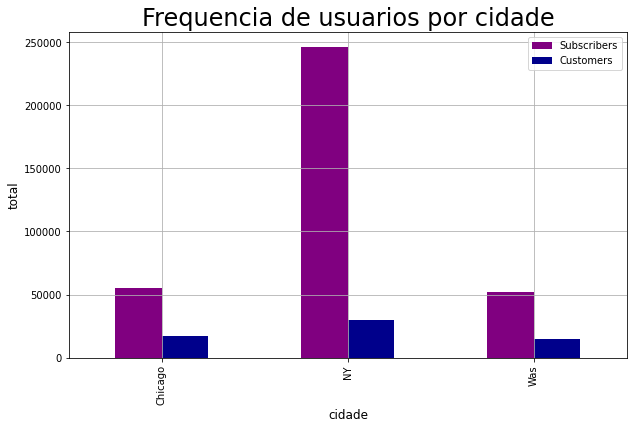

In [608]:
# Alterando o tamanho (criando uma nova figura por isso o 'ax')
fig, ax = plt.subplots(figsize=(10,6))

# Cores
color = ['purple','darkblue']

# Inserindo argumento de cor
df_sub_and_cust.plot(x='City', kind='bar', color=(color), ax=ax)

# Eixo x
plt.xlabel("cidade", size = 12)

# Eixo y
plt.ylabel("total" , size = 12) 

# Titulo
plt.title("Frequencia de usuarios por cidade" , size = 24)

# Gride - fundo
plt.grid()

## Grafico 2 - Frequencia de usuarios Subscribers e Customers por mes nas cidades

### Subscriber

In [441]:
freq_sub_mes_chicago = freq_sub_mes_chicago.sort_values(by=['ordem_mes_chicago'])

In [442]:
freq_sub_mes_ny = freq_sub_mes_ny.sort_values(by=['ordem_mes_ny'])

In [443]:
freq_sub_mes_was = freq_sub_mes_was.sort_values(by=['ordem_mes_washington'])

In [444]:
freq_sub_mes_was.columns = ['mes', 'total', 'ordem_mes_washington']
freq_sub_mes_was

,mes,total,ordem_mes_washington
11,jan,2212,1
10,fev,2571,2
7,mar,4383,3
6,abr,4410,4
5,mai,4520,5
0,jun,5613,6
4,jul,5155,7
1,ago,5392,8
3,set,5204,9
2,out,5232,10


In [553]:
#GRAFICO DE LINHA
# plt.figure(figsize=(10,6))
# sns.lineplot(data = freq_sub_mes_chicago, x="mes", y="total", color = "green")
# sns.lineplot(data = freq_sub_mes_ny, x="mes", y="total", color = "blue")
# sns.lineplot(data = freq_sub_mes_was, x="mes", y="total", color = "red")
# plt.legend(labels=["Chicago","NY", "Washington"])
# plt.title( "Frequência de usuários subscribers por mês" , size = 24 ) #Define o título do gráfico e define o tamanho
# plt.xlabel( "mes" , size = 10 ) #Usa o plt para adicionar um rotulo no eixo x e define o tamanho
# plt.grid()

Use a função list() para converter uma coluna de dataframe em uma lista 

 Podemos utilizar a função list() para converter uma coluna DataFrame para uma lista, passando a DataFrame para a função list()

https://www.delftstack.com/pt/howto/python-pandas/pandas-column-to-list/#use-a-função-list-para-converter-uma-coluna-de-dataframe-em-uma-lista

In [522]:
meses = list(freq_sub_mes_chicago['mes'])
meses

['jan',
 'fev',
 'mar',
 'abr',
 'mai',
 'jun',
 'jul',
 'ago',
 'set',
 'out',
 'nov',
 'dez']

In [528]:
total_freq_sub_mes_chicago = list(freq_sub_mes_chicago['total']) 
total_freq_sub_mes_chicago

[1839, 2166, 3154, 3550, 5199, 7182, 6963, 7053, 6346, 5668, 4144, 1718]

In [529]:
total_freq_sub_mes_ny = list(freq_sub_mes_ny['total'])
total_freq_sub_mes_ny

[9692,
 10601,
 16535,
 17528,
 21246,
 26106,
 23545,
 26692,
 28306,
 28139,
 22109,
 15397]

In [530]:
total_freq_sub_mes_was = list(freq_sub_mes_was['total'])
total_freq_sub_mes_was

[2212, 2571, 4383, 4410, 4520, 5613, 5155, 5392, 5204, 5232, 4139, 2922]

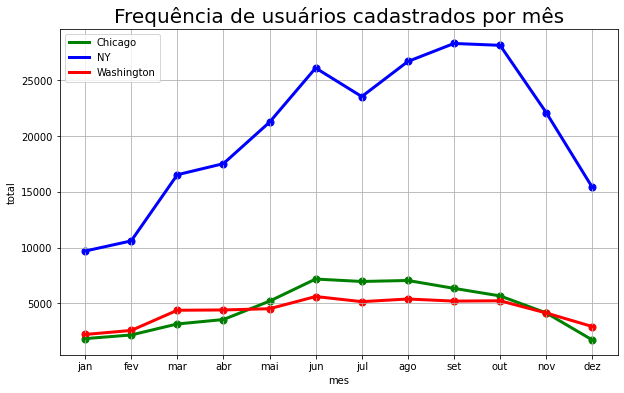

In [655]:
# Tamanho
plt.figure(figsize=(10,6))

# Chicago
plt.plot(meses, total_freq_sub_mes_chicago, color="green", linestyle = "-", linewidth=3)
plt.scatter(meses, total_freq_sub_mes_chicago, color = "green", linestyle = "-", marker = ".", s = 200)

# NY
plt.plot(meses, total_freq_sub_mes_ny, color="blue", linestyle = "-", linewidth=3)
plt.scatter(meses, total_freq_sub_mes_ny, color = "blue", linestyle = "-", marker = ".", s = 200)

# Was
plt.plot(meses, total_freq_sub_mes_was, color="red", linestyle = "-", linewidth=3)
plt.scatter(meses, total_freq_sub_mes_was, color = "red", linestyle = "-", marker = ".", s = 200)

# Legenda
plt.legend(labels=["Chicago","NY", "Washington"])

# Titulo
plt.title( "Frequência de usuários cadastrados por mês" , size = 20 )

# Eixo x
plt.xlabel( "mes" , size = 10 )

# Eixo y
plt.ylabel("total", size = 10)

# Gride
plt.grid()

# Show
plt.show()

### Customer

In [446]:
freq_cust_mes_chicago = freq_cust_mes_chicago.sort_values(by=['ordem_mes_chicago'])

In [447]:
freq_cust_mes_ny = freq_cust_mes_ny.sort_values(by=['ordem_mes_ny'])

In [448]:
freq_cust_mes_was = freq_cust_mes_was.sort_values(by=['ordem_mes_washington'])

In [449]:
freq_cust_mes_was.columns = ['mes', 'total', 'ordem_mes_washington']

In [554]:
#GRAFICO DE LINHA
# plt.figure(figsize=(10,6))
# sns.lineplot(data = freq_cust_mes_chicago, x="mes", y="total", color = "green")
# sns.lineplot(data = freq_cust_mes_ny, x="mes", y="total", color = "blue")
# sns.lineplot(data = freq_cust_mes_was, x="mes", y="total", color = "red")
# plt.legend(labels=["Chicago","NY", "Washington"])
# plt.title( "Frequência de usuários customers por mês" , size = 24 ) #Define o título do gráfico e define o tamanho
# plt.xlabel( "mes" , size = 10 ) #Usa o plt para adicionar um rotulo no eixo x e define o tamanho

Use a função list() para converter uma coluna de dataframe em uma lista 

 Podemos utilizar a função list() para converter uma coluna DataFrame para uma lista, passando a DataFrame para a função list()

https://www.delftstack.com/pt/howto/python-pandas/pandas-column-to-list/#use-a-função-list-para-converter-uma-coluna-de-dataframe-em-uma-lista

In [556]:
total_freq_cust_mes_chicago = list(freq_cust_mes_chicago['total'])
total_freq_cust_mes_chicago

[62, 228, 565, 1017, 2012, 2612, 3323, 2757, 2354, 1492, 667, 60]

In [557]:
total_freq_cust_mes_ny = list(freq_cust_mes_ny['total'])
total_freq_cust_mes_ny

[488, 569, 1878, 2632, 3209, 3136, 3977, 4412, 4393, 3006, 1799, 686]

In [558]:
total_freq_cust_mes_was = list(freq_cust_mes_was['total'])
total_freq_cust_mes_was

[222, 283, 1188, 1192, 1248, 1707, 2186, 1806, 1674, 1560, 1075, 432]

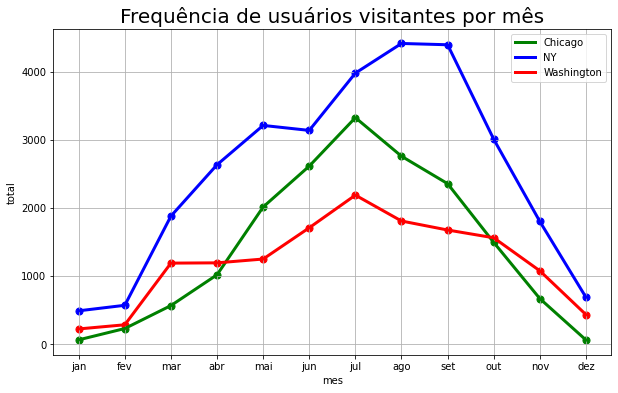

In [654]:
# Tamanho
plt.figure(figsize=(10,6))

# Chicago
plt.plot(meses, total_freq_cust_mes_chicago, color="green", linestyle = "-", linewidth=3)
plt.scatter(meses, total_freq_cust_mes_chicago, color = "green", linestyle = "-", marker = ".", s = 200)

# NY
plt.plot(meses, total_freq_cust_mes_ny, color="blue", linestyle = "-", linewidth=3)
plt.scatter(meses, total_freq_cust_mes_ny, color = "blue", linestyle = "-", marker = ".", s = 200)

# Was
plt.plot(meses, total_freq_cust_mes_was, color="red", linestyle = "-", linewidth=3)
plt.scatter(meses, total_freq_cust_mes_was, color = "red", linestyle = "-", marker = ".", s = 200)

# Legenda
plt.legend(labels=["Chicago","NY", "Washington"])

# Titulo
plt.title( "Frequência de usuários visitantes por mês" , size = 20 )

# Eixo x
plt.xlabel( "mes" , size = 10 )

# Eixo y
plt.ylabel("total", size = 10)

# Gride
plt.grid()

# Show
plt.show()

## Duração média de viagem por tipo de usuário

### Chicago

In [451]:
df_media_viagem_users_chicago.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2.5px solid black')]}])

,users,duracao
0,Customer,30.979781
1,Subscriber,12.067202


### NY

In [452]:
df_media_viagem_users_ny.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2.5px solid black')]}])

,users,duracao
0,Customer,32.982004
1,Subscriber,13.680791


### Washington

In [453]:
df_media_viagem_users_was.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2.5px solid black')]}])

,users,duracao
0,Customer,41.678031
1,Subscriber,12.528120


## Mediana de viagem por tipo de usuário

### Chicago

In [454]:
df_mediana_viagem_users_chicago.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2.5px solid black')]}])

,users,duracao
0,Customer,22.566667
1,Subscriber,9.616667


### NY

In [455]:
df_mediana_viagem_users_ny.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2.5px solid black')]}])

,users,duracao
0,Customer,21.233333
1,Subscriber,9.716667


### Washington

In [456]:
df_mediana_viagem_users_was.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2.5px solid black')]}])

,users,duracao
0,Customer,24.896717
1,Subscriber,9.733217


## Agrupando os Datasets

In [457]:
df_ny.head()

,duracao,mes,hora,dia_semana,tipo_usuario
0,13.983333,jan,0,Friday,Customer
1,11.433333,jan,0,Friday,Subscriber
2,5.250000,jan,0,Friday,Subscriber
3,12.316667,jan,0,Friday,Subscriber
4,20.883333,jan,0,Friday,Customer


In [458]:
df_ny['cidade'] = ["NYC"] * len(df_ny) #adicionando uma nova coluna com o nome da cidade 

In [459]:
df_was['cidade'] =["WAS"] * len(df_was) #adicionando uma nova coluna com o nome da cidade 

In [460]:
df_chicago['cidade']=["CHICAGO"] * len(df_chicago)  #adicionando uma nova coluna com o nome da cidade 

In [461]:
df_chicago.head()

,duracao,mes,hora,dia_semana,tipo_usuario,cidade
0,15.433333,mar,23,Thursday,Subscriber,CHICAGO
1,3.300000,mar,22,Thursday,Subscriber,CHICAGO
2,2.066667,mar,22,Thursday,Subscriber,CHICAGO
3,19.683333,mar,22,Thursday,Subscriber,CHICAGO
4,10.933333,mar,22,Thursday,Subscriber,CHICAGO


In [462]:
df_was.head()

,duracao,mes,hora,dia_semana,tipo_usuario,cidade
0,7.123117,mar,22,Thursday,Subscriber,WAS
1,9.792517,mar,22,Thursday,Subscriber,WAS
2,6.632983,mar,22,Thursday,Subscriber,WAS
3,7.404700,mar,22,Thursday,Subscriber,WAS
4,13.014583,mar,22,Thursday,Subscriber,WAS


In [463]:
df_ny.head()

,duracao,mes,hora,dia_semana,tipo_usuario,cidade
0,13.983333,jan,0,Friday,Customer,NYC
1,11.433333,jan,0,Friday,Subscriber,NYC
2,5.250000,jan,0,Friday,Subscriber,NYC
3,12.316667,jan,0,Friday,Subscriber,NYC
4,20.883333,jan,0,Friday,Customer,NYC


In [464]:
df_geral = pd.concat([df_ny,df_was,df_chicago]) #juntando os datas sets

In [465]:
df_geral

,duracao,mes,hora,dia_semana,tipo_usuario,cidade
0,13.983333,jan,0,Friday,Customer,NYC
1,11.433333,jan,0,Friday,Subscriber,NYC
2,5.250000,jan,0,Friday,Subscriber,NYC
3,12.316667,jan,0,Friday,Subscriber,NYC
4,20.883333,jan,0,Friday,Customer,NYC
...,...,...,...,...,...,...
72126,3.883333,out,1,Saturday,Subscriber,CHICAGO
72127,7.866667,out,1,Saturday,Subscriber,CHICAGO
72128,17.816667,out,0,Saturday,Customer,CHICAGO
72129,24.866667,out,0,Saturday,Subscriber,CHICAGO


## Gráfico 3 - Frequencia de usuários Subscriber e Customer em relação ao horário nas cidades

### Subscriber

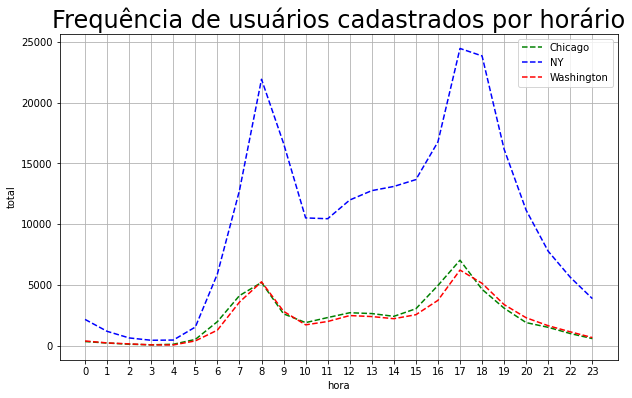

In [653]:
# Tamanho da figura
plt.figure(figsize=(10,6))

# Chicago
sns.lineplot(data = freq_sub_hora_chicago, x="hora", y="total", color = "green", linestyle = "--")

# NY
sns.lineplot(data = freq_sub_hora_ny, x="hora", y="total", color = "blue", linestyle = "--")

# Was
sns.lineplot(data = freq_sub_hora_was, x="hora", y="total", color = "red", linestyle = "--")

# Legenda
plt.legend(labels=["Chicago","NY", "Washington"])

# Titulo
plt.title( "Frequência de usuários cadastrados por horário" , size = 24 ) #Define o título do gráfico e define o tamanho

# Eixo x
plt.xlabel( "hora" , size = 10 ) #Usa o plt para adicionar um rotulo no eixo x e define o tamanho

# Muda a escala do eixo X
plt.xticks([0, 1, 2, 3 , 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]) # mudar escala do eixo X

# Grid de fundo
plt.grid()

### Customer

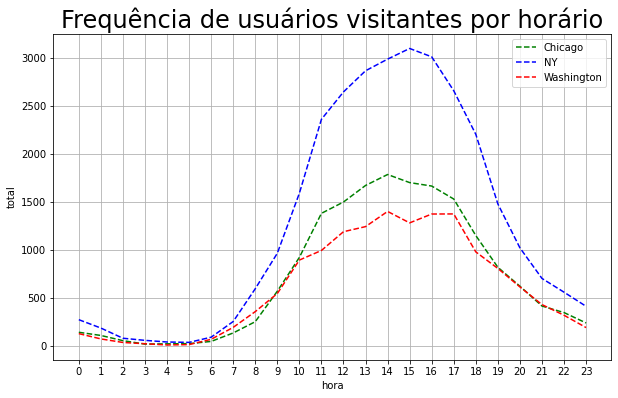

In [652]:
# Tamanho da figura
plt.figure(figsize=(10,6))

# Chicago
sns.lineplot(data = freq_cust_hora_chicago, x="hora", y="total", color = "green", linestyle = "--")

# NY
sns.lineplot(data = freq_cust_hora_ny, x="hora", y="total", color = "blue", linestyle = "--")

# Was
sns.lineplot(data = freq_cust_hora_was, x="hora", y="total", color = "red", linestyle = "--")

# Legenda
plt.legend(labels=["Chicago","NY", "Washington"])

# Titulo
plt.title( "Frequência de usuários visitantes por horário" , size = 24 ) #Define o título do gráfico e define o tamanho

# Eixo x
plt.xlabel( "hora" , size = 10 ) #Usa o plt para adicionar um rotulo no eixo x e define o tamanho

# Muda a escala do eixo X
plt.xticks([0, 1, 2, 3 , 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]) # mudar escala do eixo X

# Grid de fundo
plt.grid()

## Gráfico 4 - Frequencia de usuários Subscriber e Customer por dia da semana nas cidades

### Subscriber

In [662]:
freq_sub_dia_chicago

,dia,total,ordem_dia_chicago
6,Sunday,5372,1
5,Saturday,5676,2
1,Monday,8840,3
2,Friday,8648,4
0,Tuesday,9356,5
3,Thursday,8643,6
4,Wednesday,8447,7


In [663]:
ordem_dia_chicago = [7, 6, 1, 5, 2, 4, 3]
freq_sub_dia_chicago['ordem_dia_chicago'] = ordem_dia_chicago
print(freq_sub_dia_chicago)

         dia  total  ordem_dia_chicago
6     Sunday   5372                  7
5   Saturday   5676                  6
1     Monday   8840                  1
2     Friday   8648                  5
0    Tuesday   9356                  2
3   Thursday   8643                  4
4  Wednesday   8447                  3


In [664]:
freq_sub_dia_chicago = freq_sub_dia_chicago.sort_values(by=['ordem_dia_chicago'])
freq_sub_dia_chicago

,dia,total,ordem_dia_chicago
1,Monday,8840,1
0,Tuesday,9356,2
4,Wednesday,8447,3
3,Thursday,8643,4
2,Friday,8648,5
5,Saturday,5676,6
6,Sunday,5372,7


In [471]:
freq_sub_dia_ny

,dia,total
0,Wednesday,41403
1,Thursday,41197
2,Tuesday,39487
3,Friday,37606
4,Monday,35623
5,Saturday,26126
6,Sunday,24454


In [472]:
ordem_dia_ny = [3, 4, 2, 5, 1, 6, 7]
freq_sub_dia_ny['ordem_dia_ny'] = ordem_dia_ny
print(freq_sub_dia_ny)

         dia  total  ordem_dia_ny
0  Wednesday  41403             3
1   Thursday  41197             4
2    Tuesday  39487             2
3     Friday  37606             5
4     Monday  35623             1
5   Saturday  26126             6
6     Sunday  24454             7


In [660]:
freq_sub_dia_ny = freq_sub_dia_ny.sort_values(by=['ordem_dia_ny'])
freq_sub_dia_ny

,dia,total,ordem_dia_ny
4,Monday,35623,1
2,Tuesday,39487,2
0,Wednesday,41403,3
1,Thursday,41197,4
3,Friday,37606,5
5,Saturday,26126,6
6,Sunday,24454,7


In [474]:
freq_sub_dia_was

,dia,total
0,Wednesday,8520
1,Thursday,8454
2,Tuesday,8322
3,Friday,7958
4,Monday,7658
5,Saturday,5589
6,Sunday,5252


In [475]:
ordem_dia_washington = [3, 4, 2, 5, 1, 6, 7]
freq_sub_dia_was['ordem_dia_washington'] = ordem_dia_washington
print(freq_sub_dia_was)

         dia  total  ordem_dia_washington
0  Wednesday   8520                     3
1   Thursday   8454                     4
2    Tuesday   8322                     2
3     Friday   7958                     5
4     Monday   7658                     1
5   Saturday   5589                     6
6     Sunday   5252                     7


In [658]:
freq_sub_dia_was = freq_sub_dia_was.sort_values(by=['ordem_dia_washington'])
freq_sub_dia_was

,dia,total,ordem_dia_washington
4,Monday,7658,1
2,Tuesday,8322,2
0,Wednesday,8520,3
1,Thursday,8454,4
3,Friday,7958,5
5,Saturday,5589,6
6,Sunday,5252,7


Text(0.5, 0, 'dia')

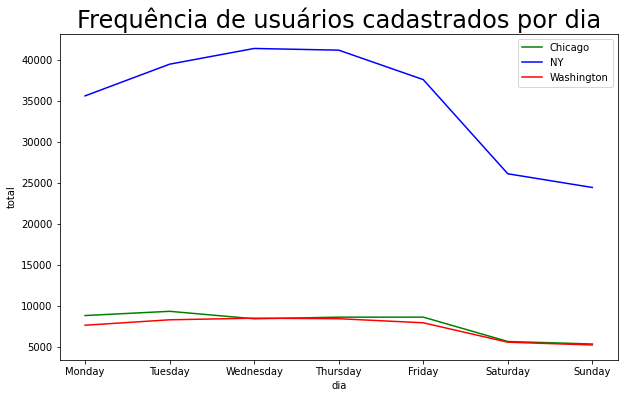

In [665]:
#GRAFICO DE LINHA
plt.figure(figsize=(10,6))
sns.lineplot(data = freq_sub_dia_chicago, x="dia", y="total", color = "green")
sns.lineplot(data = freq_sub_dia_ny, x="dia", y="total", color = "blue")
sns.lineplot(data = freq_sub_dia_was, x="dia", y="total", color = "red")
plt.legend(labels=["Chicago","NY", "Washington"])
plt.title( "Frequência de usuários cadastrados por dia" , size = 24 ) #Define o título do gráfico e define o tamanho
plt.xlabel( "dia" , size = 10 ) #Usa o plt para adicionar um rotulo no eixo x e define o tamanho

### Customer

In [478]:
freq_cust_dia_chicago

,dia,total
0,Sunday,4282
1,Saturday,4251
2,Monday,2446
3,Friday,2093
4,Tuesday,1555
5,Thursday,1365
6,Wednesday,1157


In [479]:
ordem_dia_chicago = [7, 6, 1, 5, 2, 4, 3]
freq_cust_dia_chicago['ordem_dia_chicago'] = ordem_dia_chicago
print(freq_cust_dia_chicago)

         dia  total  ordem_dia_chicago
0     Sunday   4282                  7
1   Saturday   4251                  6
2     Monday   2446                  1
3     Friday   2093                  5
4    Tuesday   1555                  2
5   Thursday   1365                  4
6  Wednesday   1157                  3


In [480]:
freq_cust_dia_chicago = freq_cust_dia_chicago.sort_values(by=['ordem_dia_chicago'])
freq_cust_dia_chicago

,dia,total,ordem_dia_chicago
2,Monday,2446,1
4,Tuesday,1555,2
6,Wednesday,1157,3
5,Thursday,1365,4
3,Friday,2093,5
1,Saturday,4251,6
0,Sunday,4282,7


In [481]:
freq_cust_dia_ny

,dia,total
0,Saturday,7069
1,Sunday,6776
2,Friday,3670
3,Monday,3620
4,Wednesday,3152
5,Thursday,3065
6,Tuesday,2833


In [482]:
ordem_dia_ny = [6, 7, 5, 1, 3, 4, 2]
freq_cust_dia_ny['ordem_dia_ny'] = ordem_dia_ny
print(freq_cust_dia_ny)

         dia  total  ordem_dia_ny
0   Saturday   7069             6
1     Sunday   6776             7
2     Friday   3670             5
3     Monday   3620             1
4  Wednesday   3152             3
5   Thursday   3065             4
6    Tuesday   2833             2


In [483]:
freq_cust_dia_ny = freq_cust_dia_ny.sort_values(by=['ordem_dia_ny'])
freq_cust_dia_ny

,dia,total,ordem_dia_ny
3,Monday,3620,1
6,Tuesday,2833,2
4,Wednesday,3152,3
5,Thursday,3065,4
2,Friday,3670,5
0,Saturday,7069,6
1,Sunday,6776,7


In [484]:
freq_cust_dia_was

,dia,total
0,Saturday,3311
1,Sunday,2975
2,Friday,2012
3,Monday,1736
4,Wednesday,1583
5,Thursday,1530
6,Tuesday,1426


In [485]:
ordem_dia_was = [6, 7, 5, 1, 3, 4, 2]
freq_cust_dia_was['ordem_dia_was'] = ordem_dia_was
print(freq_cust_dia_was)

         dia  total  ordem_dia_was
0   Saturday   3311              6
1     Sunday   2975              7
2     Friday   2012              5
3     Monday   1736              1
4  Wednesday   1583              3
5   Thursday   1530              4
6    Tuesday   1426              2


In [486]:
freq_cust_dia_was = freq_cust_dia_was.sort_values(by=['ordem_dia_was'])
freq_cust_dia_was

,dia,total,ordem_dia_was
3,Monday,1736,1
6,Tuesday,1426,2
4,Wednesday,1583,3
5,Thursday,1530,4
2,Friday,2012,5
0,Saturday,3311,6
1,Sunday,2975,7


Text(0.5, 0, 'dia')

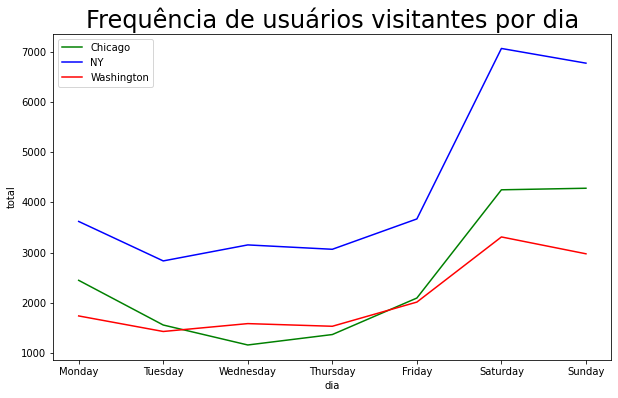

In [657]:
#GRAFICO DE LINHA
plt.figure(figsize=(10,6))
sns.lineplot(data = freq_cust_dia_chicago, x="dia", y="total", color = "green")
sns.lineplot(data = freq_cust_dia_ny, x="dia", y="total", color = "blue")
sns.lineplot(data = freq_cust_dia_was, x="dia", y="total", color = "red")
plt.legend(labels=["Chicago","NY", "Washington"])
plt.title( "Frequência de usuários visitantes por dia" , size = 24 ) #Define o título do gráfico e define o tamanho
plt.xlabel( "dia" , size = 10 ) #Usa o plt para adicionar um rotulo no eixo x e define o tamanho

## Gráfico 5 - Duração média de viagem dos usuários Subscribers e Customers nas cidades

In [488]:
customer_media_chicago = 30.979781
subscriber_media_chicago = 12.067202

In [489]:
customer_media_ny = 32.982004
subscriber_media_ny = 13.680791

In [490]:
customer_media_was = 41.678031
subscriber_media_was = 12.528120

In [491]:
df_media_viagem = pd.DataFrame([['Chicago', subscriber_media_chicago, customer_media_chicago], ['NY', subscriber_media_ny, customer_media_ny], ['Was', subscriber_media_was, customer_media_was]], columns=['City', 'Subscribers', 'Customers'])
print(df_media_viagem)

      City  Subscribers  Customers
0  Chicago    12.067202  30.979781
1       NY    13.680791  32.982004
2      Was    12.528120  41.678031


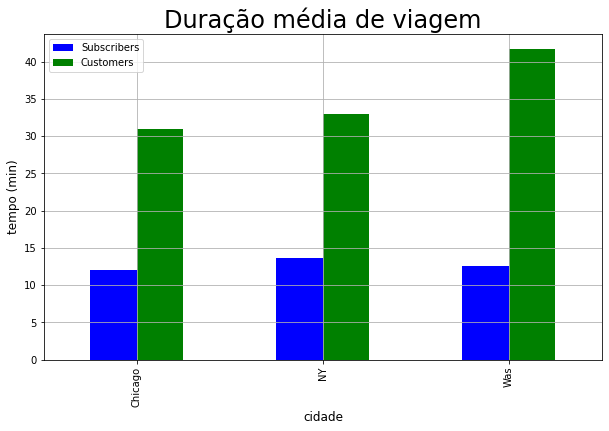

In [589]:
# Alterando o tamanho (criando uma nova figura por isso o 'ax')
fig, ax = plt.subplots(figsize=(10,6))

# Cores
color = ['blue','green']

# Inserindo argumento de cor
df_media_viagem.plot(x='City', kind='bar', color=(color), ax=ax)

# Eixo x
plt.xlabel("cidade", size = 12)

# Eixo y
plt.ylabel("tempo (min)" , size = 12) 

# Titulo
plt.title("Duração média de viagem" , size = 24)

# Gride - fundo
plt.grid()